In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
# from sklearn.inspection import plot_partial_dependence

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras import regularizers
import tensorflow.keras as keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import plotly.express as px
from pydantic_settings import BaseSettings #NEW



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# from kaggle.api.kaggle_api_extended import KaggleApi
# # # Importing data using kagle API

# # API Credentials

# os.environ['KAGGLE_USERNAME'] = 'vamsigontu'
# os.environ['KAGGLE_KEY'] = 'a953d5cd8761e5558c76da731855af7c'

# # # Initialize the Kaggle API
# # api = KaggleApi()
# # api.authenticate()  # This step is not needed if you are using the environment method for authentication

# # # Specify the dataset you want to download (replace 'dataset-owner/dataset-name' with the actual owner and name)
# # dataset_name = 'capcloudcoder/us-wildfire-data-plus-other-attributes'

# # # Download the dataset to the current directory
# # api.dataset_download_files(dataset_name, path='.', unzip=True)


In [3]:
pd.set_option('display.max_columns', None)

## Data Pre-processing and EDA(Exploratory data analysis)
### Data Cleaning and filtering data which has firesize <5000 as number of small fires are high.

In [4]:
df = pd.read_csv('wildfires.csv')
df.head()
# df.shape


,Unnamed: 0.1,Unnamed: 0,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [5]:
for col in df.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
fire_name
fire_size
fire_size_class
stat_cause_descr
latitude
longitude
state
disc_clean_date
cont_clean_date
discovery_month
disc_date_final
cont_date_final
putout_time
disc_date_pre
disc_pre_year
disc_pre_month
wstation_usaf
dstation_m
wstation_wban
wstation_byear
wstation_eyear
Vegetation
fire_mag
weather_file
Temp_pre_30
Temp_pre_15
Temp_pre_7
Temp_cont
Wind_pre_30
Wind_pre_15
Wind_pre_7
Wind_cont
Hum_pre_30
Hum_pre_15
Hum_pre_7
Hum_cont
Prec_pre_30
Prec_pre_15
Prec_pre_7
Prec_cont
remoteness


In [6]:
# Reading the combined CSV files
df = pd.read_csv('wildfires.csv')
df = df.drop(columns=['fire_name','Unnamed: 0', 'Unnamed: 0.1','disc_date_final','cont_date_final','cont_clean_date','putout_time'])
df['disc_clean_date'] = pd.to_datetime(df['disc_clean_date'], format='%m/%d/%Y')
df["day"] = df['disc_clean_date'].map(lambda x: x.day)
df["month"] = df['disc_clean_date'].map(lambda x: x.month)
df["year"] = df['disc_clean_date'].map(lambda x: x.year)
cause_encoded_dist = {
    'Missing/Undefined':0, 
    'Arson':1, 
    'Debris Burning':2, 
    'Miscellaneous':3,
    'Campfire':4, 
    'Fireworks':5, 
    'Children':6, 
    'Lightning':7, 
    'Equipment Use':8,
    'Smoking':9, 
    'Railroad':10, 
    'Structure':11, 
    'Powerline':12,
    'Other':13
}

# Encode categorical values to numeric
#df['stat_cause_encoded'] = df['stat_cause_descr'].apply(lambda x: int(cause_encoded_dist[x])).astype(np.number)
df['stat_cause_encoding'] = df['stat_cause_descr'].apply(lambda x: cause_encoded_dist[x]).astype('int')

# Get rid of outliers - fires of size larger than 5000 acres, and there are large number of small fires and other very less number are having the high 
# area of fires, because of which the deviation is very high
df = df.loc[df['fire_size'] < 5000]
df.columns

Index(['fire_size', 'fire_size_class', 'stat_cause_descr', 'latitude',
       'longitude', 'state', 'disc_clean_date', 'discovery_month',
       'disc_date_pre', 'disc_pre_year', 'disc_pre_month', 'wstation_usaf',
       'dstation_m', 'wstation_wban', 'wstation_byear', 'wstation_eyear',
       'Vegetation', 'fire_mag', 'weather_file', 'Temp_pre_30', 'Temp_pre_15',
       'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7',
       'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont',
       'Prec_pre_30', 'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness',
       'day', 'month', 'year', 'stat_cause_encoding'],
      dtype='object')

In [7]:
df['Vegetation'].unique()

array([12, 15, 16,  0,  4,  9, 14])

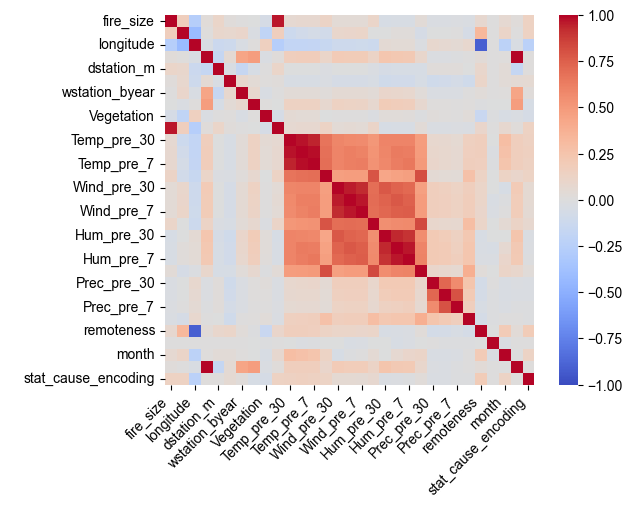

In [8]:
df_numerics_only = df.select_dtypes(include=np.number)

corr = df_numerics_only.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    # cmap=sns.diverging_palette(220, 20, n=200),
    cmap="coolwarm",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(15,16)})

In [9]:
### Dealing with missing data
print(df.shape)

# drop columns where weather_file is missing in the data, as it wont have the weather situation at that time, so its where ever data is 
#missing we can remove those rows as it wont be useful
index = df[df['weather_file'] == 'File Not Found'].index
df.drop(index, inplace = True)
print(df.shape)

(51395, 40)
(37915, 40)


In [10]:
# Weather data has a lot of 0 and values some of which may be missing values,
# Mark '0' values in weather columns as Na (to see how many there are) 
# As 0 wont add any value to the data, we are converting to NA and then removing them which will make data set
subset0 = ['Temp_pre_30','Temp_pre_15','Temp_pre_7','Temp_cont','Wind_pre_30','Wind_pre_15','Wind_pre_7','Wind_cont','Hum_pre_30', 'Hum_pre_15','Hum_pre_7','Hum_cont']
df[subset0] = df[subset0].replace({0:np.nan, '0':np.nan})
print(df.shape)
# Mark '-1' as missing
subset_neg1 = ['Temp_pre_30','Temp_pre_15','Temp_pre_7','Temp_cont','Wind_pre_30','Wind_pre_15','Wind_pre_7','Wind_cont','Hum_pre_30', 'Hum_pre_15','Hum_pre_7','Hum_cont','Prec_pre_30','Prec_pre_15','Prec_pre_7','Prec_cont']
df[subset_neg1] = df[subset_neg1].replace({-1:np.nan})

# Drop observations where all weather columns are 0
df = df.dropna(how='all',
                    subset=['Temp_pre_30','Temp_pre_15','Temp_pre_7','Temp_cont','Wind_pre_30','Wind_pre_15','Wind_pre_7','Wind_cont',])
print(df.shape)
# This leaves us with 35,683 observations  +/- 3,000  to work with (originally we had 50,000)

(37915, 40)
(35683, 40)


In [11]:
# fill the 'pre' columns temp wind and humidity with mean values
subset_fill_mean = ['Temp_pre_30','Temp_pre_15','Temp_pre_7', 'Wind_pre_30','Wind_pre_15','Wind_pre_7', 'Hum_pre_30', 'Hum_pre_15','Hum_pre_7']
df[subset_fill_mean] = df[subset_fill_mean].fillna(df[subset_fill_mean].mean())

# Fill NAs in the date of fire containment based on mean values from previous days
for col in ['Temp','Wind','Hum']:
    df[f'{col}_cont'] = df.apply(
        lambda row: (row[f'{col}_pre_7']+row[f'{col}_pre_15']+row[f'{col}_pre_30'])/3 if np.isnan(row[f'{col}_cont']) else row[f'{col}_cont'],
        axis=1)

In [12]:
df_numerics_only

,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,day,month,year,stat_cause_encoding
0,10.0,18.105072,-66.753044,2007,58917.69716,11603,1945,2018,12,1.0,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923,11,2,2007,0
1,3.0,35.038330,-87.610000,2006,32665.34327,13896,1978,2020,15,0.1,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355,11,12,2006,1
2,60.0,34.947800,-88.722500,2004,105122.14950,13896,1978,2020,16,1.0,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544,29,2,2004,1
3,1.0,39.641400,-119.308300,2005,43433.32978,23185,1942,2020,0,0.1,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447,6,6,2005,2
4,2.0,30.700600,-90.591400,1999,25940.57409,3908,1987,2016,12,0.1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633,22,9,1999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55356,4336.0,34.316000,-112.268300,2015,39824.76795,23184,1946,2020,16,50.0,23.350785,23.093421,24.573373,24.465102,3.351969,2.970263,2.924852,3.193614,45.053836,46.349030,40.786982,49.818887,86.9,78.8,6.9,41.0,0.192487,2,8,2015,7
55357,4856.0,29.616667,-94.273333,2015,22333.66929,99999,1988,2020,12,50.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.548644,30,7,2015,7
55359,3500.0,37.678611,-96.249722,2015,71289.72904,141,2008,2018,0,50.0,4.040390,10.079851,10.792415,14.275880,3.748422,3.371681,3.712774,4.053697,65.333170,65.610338,68.433839,67.544737,0.0,0.0,0.0,0.0,0.366712,21,3,2015,0
55360,3500.0,37.606667,-96.422500,2015,71869.17555,99999,1973,2020,0,50.0,3.686132,3.039857,4.437563,-0.052527,5.100510,5.694737,4.975000,4.559206,62.971774,69.376658,68.118919,64.008028,20.1,18.8,0.0,3.8,0.365622,12,2,2015,0


In [62]:
def yearlyFires():
    years = list(df.year.unique())
    years.sort()
    for year in years:
        yearDf= df[df["year"]==year]
        print("Creating map with ", yearDf.size," fires ...")
        fig = px.scatter_geo(yearDf,lat='latitude',lon='longitude',
                          size="fire_size",
                          color = "fire_size_class")
        title = f"US Map of Fires(year ={year})"
        fig.update_layout(title = title,geo_scope='usa', title_x=0.5)

        #fig.show()
        fig.write_image(f"USmapByYear/{year}_USmapFires.png")
yearlyFires()


Creating map with  38950  fires ...
Creating map with  37925  fires ...
Creating map with  45797  fires ...
Creating map with  45305  fires ...
Creating map with  45838  fires ...
Creating map with  32431  fires ...
Creating map with  38991  fires ...
Creating map with  60721  fires ...
Creating map with  64411  fires ...
Creating map with  53915  fires ...
Creating map with  48667  fires ...
Creating map with  42148  fires ...
Creating map with  42394  fires ...
Creating map with  80278  fires ...
Creating map with  111438  fires ...
Creating map with  84993  fires ...
Creating map with  87002  fires ...
Creating map with  72611  fires ...
Creating map with  75030  fires ...
Creating map with  91963  fires ...
Creating map with  69741  fires ...
Creating map with  53054  fires ...
Creating map with  58917  fires ...
Creating map with  63058  fires ...


In [64]:
print("Creating map with all fires - size: ", df.size)
fig = px.scatter_geo(df,lat='latitude',lon='longitude',
                  size="fire_size",
                  color = "fire_size_class")
title = f"US Map of Fires"
fig.update_layout(title = title,geo_scope='usa', title_x=0.5)

#fig.show()
fig.write_image(f"USmapByYear/All_USmapFires.png")

Creating map with all fires - size:  1445578


In [13]:
#https://www.fs.usda.gov/about-agency/contact-us/regional-offices
#https://www.latlong.net/
#[ top left, bottom left, bottom right top right]
def createRegionDF(coords,regionName,regionDF):
    coords = [ (coord[0],coord[1],regionName) for coord in coords]
    if(len(regionDF)==0 ):
        regionDF = pd.DataFrame(data= coords, index=None, columns=["lat","lon","region"] )
    else:
        newRegionDF = pd.DataFrame(data= coords, index=None, columns=["lat","lon","region"] )
        regionDF = pd.concat([regionDF,newRegionDF],axis=0)
    return regionDF
region1_coordinates = [(48.998625,-117.032181),(45.424841, -116.575238), (45.548077, -114.563236),(45.458889, -114.340904),(45.702748,-113.970683),(44.355692,-112.842069),(44.501816, -112.716047),(44.446140,-112.386114),(44.536460, -112.353637) ,(44.562305,-111.868789),(44.541651,-111.463793),(44.752791,-111.382034),(44.476095, -111.052484),(45.000642, -111.054512),(44.997898,-104.039652),(45.945135, -104.045442),(45.935240, -96.563685),(49.000315,-97.238073)]
region2_coordinates = [(44.476095, -111.052484),(44.476095,-110.001004),(44.159549,-109.050031),(41.000701,-109.050031),(36.998911, -109.045210),(36.689620,-109.045210),(36.689620,-103.002242),(37.000070,-103.002242),(37.000070,-94.617957),(39.101825,-94.617957),(42.435240, -96.420416),(45.301939, -96.420416),(45.604551, -96.855765),(45.935240, -96.563685),(45.00064,111.0545),(44.9979,104.0397),(45.94519,104.0454),(45.000642, -111.054512),(44.997898,-104.039652),(45.945135, -104.045442),(45.935240, -96.563685)]
region3_coordinates = [(36.689620,-114.050103) ,(36.195716,-114.050103),(36.023904,-114.152134),(36.095684,-114.748691),(35.001852,-114.633024),(34.876637,-114.635455),(34.715618,-114.486139),(34.466089,-114.402030),(34.302181,-114.138016),(34.258653,-114.132248),(34.095316,-114.422722),(33.933782,-114.535904),(33.347272,-114.698987),(33.289786,-114.726255),(33.071656,-114.687490),(32.974216,-114.472487),(32.844382,-114.469185),(32.718194,-114.719968),(32.493855,-114.813498),(31.332248,-111.074822),(31.332248,-108.208456),(31.783597,-108.208456),(31.783597,-106.527977),(31.897016,-106.645840),(32.000679,-106.645840),(32.000379,-103.064510) ,(36.689620,-109.045210),(36.689620,-103.002242)]
region4_coordinates = [(45.424841, -116.575238), (45.548077, -114.563236),(45.458889, -114.340904),(45.702748,-113.970683),(44.355692,-112.842069),(44.501816, -112.716047),(44.446140,-112.386114),(44.536460, -112.353637) ,(44.562305,-111.868789),(44.541651,-111.463793),(44.752791,-111.382034),(44.476095, -111.052484),(44.476095,-110.001004),(44.159549,-109.050031),(41.000701,-109.050031),(36.998911, -109.045210),(36.689620,-109.045210),(36.689620,-114.050103) ,(36.195716,-114.050103),(36.023904,-114.152134),(36.095684,-114.748691),(35.001852,-114.633024)   ,(38.999594,-120.001012) ,(41.994873,-120.001012) ,(41.994873,-117.026266) ]
region5_coordinates = [(35.001852,-114.633024),(34.876637,-114.635455),(34.715618,-114.486139),(34.466089,-114.402030),(34.302181,-114.138016),(34.258653,-114.132248),(34.095316,-114.422722),(33.933782,-114.535904),(33.347272,-114.698987),(33.289786,-114.726255),(33.071656,-114.687490),(32.974216,-114.472487),(32.844382,-114.469185),(32.718194,-114.719968),(38.999594,-120.001012),(41.994873,-120.001012),(32.515552,-117.235491),(34.243595,-120.939332),(40.338170,-124.717891),(41.99487,-124.598449) ]     
region6_coordinates=[(48.407326,-125.003417),(48.380882,-123.134889),(48.999592,-123.320267),(48.999099,-117.032380),(41.99487,-124.598449),(41.994873,-120.001012),(41.99487,-117.0263),(45.4284,-116.5752),(48.99863,-117.0322)]
region8_coordinates = [(36.689620,-103.002242),(31.332248,-108.208456),(31.783597,-108.208456),(31.783597,-106.527977),(31.897016,-106.645840),(32.000679,-106.645840),(32.000379,-103.064510),(37.000070,-103.002242),(37.000070,-94.617957),(36.499488,-94.617874), (36.484245,-90.159248),(35.994952,-90.375636), (36.000941,-89.706940), (36.974033,-89.137409), (37.145540,-89.089624), (37.219940,-88.948239), (37.067780,-88.554268), (37.087364,-88.448597), (37.205586,-88.450610), (37.290170,-88.512708), (37.423889,-88.409754), (37.400437,-88.368572), (37.469136,-88.095988), (37.495290,-88.062357), (37.673767,-88.146777), (37.924024,-87.904758), (38.854681,-84.793704), (39.105022,-84.487693), (38.781922,-84.216453), (38.717662,-82.882168), (38.415938,-82.590182), (38.146438,-82.639409), (37.620758,-82.348588), (37.103932,-81.727357), (37.447606,-80.304973), (38.451438,-79.228965), (39.270537,-78.389899), (39.680769,-78.173912), (39.331111,-77.762201), (39.216295,-77.465616), (39.120472,-77.528761) , (38.874998,-77.042818), (38.399797,-77.312423), (37.881357,-76.252680), (37.983175,-74.876576),(36.888408,-75.589566),(35.146863,-75.172259),(31.306715,-80.882779),(27.000408,-79.896863),(24.507143,-80.555769),(28.902397,-84.904550),(28.709861,-89.345415),(28.478349,-95.187717),(25.943227,-96.910542),(26.357420,-99.119591),(29.621221,-101.513572),(28.912015,-103.138874),(30.073848,-104.830540)]#
region9_coordinates = [(37.000070,-94.617957),(39.101825,-94.617957),(42.435240, -96.420416),(45.301939, -96.420416),(45.604551, -96.855765),(45.935240, -96.563685),(36.499488,-94.617874), (36.484245,-90.159248),(35.994952,-90.375636), (36.000941,-89.706940), (36.974033,-89.137409), (37.145540,-89.089624), (37.219940,-88.948239), (37.067780,-88.554268), (37.087364,-88.448597), (37.205586,-88.450610), (37.290170,-88.512708), (37.423889,-88.409754), (37.400437,-88.368572), (37.469136,-88.095988), (37.495290,-88.062357), (37.673767,-88.146777), (37.924024,-87.904758), (38.854681,-84.793704), (39.105022,-84.487693), (38.781922,-84.216453), (38.717662,-82.882168), (38.415938,-82.590182), (38.146438,-82.639409), (37.620758,-82.348588), (37.103932,-81.727357), (37.447606,-80.304973), (38.451438,-79.228965), (39.270537,-78.389899), (39.680769,-78.173912), (39.331111,-77.762201), (39.216295,-77.465616), (39.120472,-77.528761) , (38.874998,-77.042818), (38.399797,-77.312423), (37.881357,-76.252680), (37.983175,-74.876576),(49.00032,-97.23807),(49.368066,-94.978894),(46.483265,-84.392468),(44.071800,-82.152187),(41.656497,-82.635385),(44.918139,-74.948146),(47.323931,-69.237625),(47.234490,-68.079804),(44.543505,-66.937208),(40.896906,-69.484978)]
region10_coordinates = [(70.641769,-166.837630),(65.594800,-168.271506),(60.053874,-167.876564),(57.715885,-159.793981),(57.868132,-158.483863),(52.133488,-177.723924),(53.357109,-187.651444),(55.751849,-193.449818),(55.553495,-194.679777),(54.546580,-194.416214),(51.481383,-186.333632),(50.541363,-176.230403),(59.063154,-143.548657),(54.431713,-133.649274),(55.216490,-129.871545),(59.745326,-135.401178),(58.893296,-137.377897),(60.307906,-140.988369),(69.885010,-140.718507)]

regionDF = createRegionDF(region1_coordinates,1,pd.DataFrame())
regionDF = createRegionDF(region2_coordinates,2,regionDF)
regionDF = createRegionDF(region3_coordinates,3,regionDF)
regionDF = createRegionDF(region4_coordinates,4,regionDF)
regionDF = createRegionDF(region5_coordinates,5,regionDF)
regionDF = createRegionDF(region6_coordinates,6,regionDF)
regionDF = createRegionDF(region8_coordinates,8,regionDF)
regionDF = createRegionDF(region9_coordinates,9,regionDF)
regionDF = createRegionDF(region10_coordinates,10,regionDF)

print("Regions in Dataframe ",regionDF["region"].unique())

Regions in Dataframe  [ 1  2  3  4  5  6  8  9 10]


In [14]:
#sanity check: to make sure forming polygons correctly
for i in range(1,11):
    if(i!=7):
        fig = px.scatter_geo(regionDF[regionDF["region"]==i],lat='lat',lon='lon',color = "region")
        fig.update_layout(title = f'Region {i}',geo_scope='usa', title_x=0.5)
        fig.write_image(f"Regions/region{i}.png")
        fig.show()



**Shows all formed polygons**

In [15]:
fig = px.scatter_geo(regionDF,lat='lat',lon='lon',color="region", color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(title = 'US map By region borders',geo_scope='usa', title_x=0.5)
fig.write_image(f"Regions/allRegions.png")
fig.show()


In [16]:

def checkIfCoordInRegion(regionName,regionDF,df):#reference: https://stackoverflow.com/questions/61042261/how-to-check-if-a-lat-lon-coordinate-is-within-a-polygon-using-python-taking
    polygon = Polygon([tuple(x) for x in regionDF[['lat', 'lon']].to_numpy()])
    df[f'Within_{regionName}'] = df.apply(lambda x: polygon.contains(Point(x['latitude'], x['longitude'])), axis=1)
    return df


for i in range(1,11):
    if(i!=7):
        df = checkIfCoordInRegion(f"Region{i}",regionDF[regionDF["region"]==i],df)

In [17]:
#sanity check for region labels
region1Coord_test =df[df["state"]== "CA"][0:15][["latitude","longitude","Within_Region1","Within_Region2","Within_Region5"]]
print(region1Coord_test)

      latitude   longitude  Within_Region1  Within_Region2  Within_Region5
78   34.330000 -117.513056           False           False           False
88   35.298056 -120.480000           False           False            True
123  36.060200 -118.096500           False           False           False
159  39.965000 -122.318056           False           False            True
192  40.228611 -120.671389           False           False           False
267  36.568867 -119.481683           False           False            True
274  33.504110 -116.379500           False           False           False
302  32.853056 -116.885000           False           False           False
308  39.951177 -122.200397           False           False            True
309  37.113056 -120.346944           False           False            True
312  35.928294 -119.312886           False           False            True
394  37.323889 -120.550000           False           False            True
436  37.265000 -120.18805

In [18]:
#defining one region column
def regionNum(x):
    #print(x)
    if(x['state']=='HI'):
        return 5
    else:
        #print(x[["LATITUDE","LONGITUDE","STATE"]])
        listRegion = list(x[["Within_Region1","Within_Region2","Within_Region3","Within_Region4","Within_Region5","Within_Region6","Within_Region8","Within_Region9","Within_Region10"]])
        #print(istRegion)
        if(np.sum(listRegion)!=1):
                return -1
        if(x["Within_Region1"]):
            return 1
        if(x["Within_Region2"]):
            return 2
        if(x["Within_Region3"]):
            return 3
        if(x["Within_Region4"]):
            return 4
        if(x["Within_Region5"]):
            return 5
        if(x["Within_Region6"]):
            return 6
        if(x["Within_Region8"]):
            return 8
        if(x["Within_Region9"]):
            return 9
        if(x["Within_Region10"]):
            return 10
def reformatRegionClassification(df):
    df["Region"] = df.apply( lambda x: regionNum(x), axis=1)
    return df
df = reformatRegionClassification(df)

In [19]:
print("incorrect",df[df["Region"]== -1].shape[0])
print("correct",df[df["Region"]!= -1].shape[0])
print("Total",df.shape[0])

incorrect 3811
correct 31872
Total 35683


This mean 3811 are not correct out of  and need to be removed/corrected. Region boundaries as mentioned in the other notebook will force us to exclude those corresponding states.

In [20]:
statesLeft = df[df["Region"]==-1]["state"].unique()
overlapStates = ['OK','WY','ID','PR']
for i in range(len(overlapStates)):
    statesLeft=statesLeft[statesLeft != overlapStates[i]]
print("States with overlap:", overlapStates)

States with overlap: ['OK', 'WY', 'ID', 'PR']


In [21]:
def adjustDf(df):
    print(f"Before adjustments there are ",df[df["Region"]== -1].shape[0] ," rows classified incorrectly") 

    #will go by state(assuming no overlap within state with region) to classify 
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'MT') , 1, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'SD') , 2, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'KS') , 2, df['Region'])

    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'AZ') , 3, df['Region'])

    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'NM') , 4, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'NV') , 4, df['Region'])


    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'CA') , 5, df['Region'])

    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'WA') , 6, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'OR') , 6, df['Region'])

    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'TX') , 8, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'FL') , 8, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'KY') , 8, df['Region'])

    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'NJ') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'MD') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'WV') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'DE') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'PA') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'NY') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'MN') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'MO') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'IN') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'IL') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'WI') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'MI') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'OH') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'ME') , 9, df['Region'])
    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'IA') , 9, df['Region'])

    df['Region'] = np.where((df['Region'] ==-1) & (df['state'] == 'AK') , 10, df['Region'])

    #rest of them to a region else will be dropped from the DS
    print("After adjustments: ",df[df["Region"]== -1].shape[0], " --these rows will be dropped from the df")
    #df = df[df['Region'] != -1]
    print("Final count of misclassified fire regions: ",df[df["Region"]== -1].shape[0])
    return df[df["Region"]!= -1]

In [22]:
df = df.drop(["Within_Region1","Within_Region2","Within_Region3","Within_Region4","Within_Region5","Within_Region6","Within_Region8","Within_Region9","Within_Region10"], axis='columns')

Creating a database with **df_adjusted**: "using states with no overlap to adjust incorrect labels and drop ones that are left".

In [23]:
df_adjusted = df.copy()
df_adjusted = adjustDf(df_adjusted)

Before adjustments there are  3811  rows classified incorrectly
After adjustments:  425  --these rows will be dropped from the df
Final count of misclassified fire regions:  425


**Removing all outlier rows from fire size**

In [24]:
def dropOutliers(dfTemp,fireSizeThreshold):#taken from pre-processing notebook created by duy
    df= dfTemp.copy()
    # Pre-processing min, max, median, std, IQR
    df_fire_size = df['fire_size']
    # Number of objects
    numObj = df_fire_size.count()
    print('count', numObj)
    # The minimum value
    minValue = df_fire_size.min()
    print('min', minValue)
    # The maximum value
    maxValue = df_fire_size.max()
    print('max', maxValue)
    # The mean value
    mean = df_fire_size.mean()
    print('mean', mean)
    # The standard deviation value
    stdev = df_fire_size.std()
    print('std', stdev)
    # The Q1 value
    Q1 = df_fire_size.quantile(1 / 4)
    print('Q1', Q1)
    # The median value
    median = df_fire_size.median()
    print('median', median)
    # The Q3 value
    Q3 = df_fire_size.quantile(3/4)
    print('Q3', Q3)
    # The IQR value
    IQR = Q3 - Q1
    print('IQR', IQR)
    
    #df_fire_size = (df.loc[df['fire_size'] < fireSizeThreshold])['fire_size']
    
    df = df.drop(df[df['fire_size'] >= fireSizeThreshold].index)
    df_fire_size = df['fire_size']
    # Number of objects
    numObj = df_fire_size.count()
    print('count', numObj)
    # The minimum value
    minValue = df_fire_size.min()
    print('min', minValue)
    # The maximum value
    maxValue = df_fire_size.max()
    print('max', maxValue)
    # The mean value
    mean = df_fire_size.mean()
    print('mean', mean)
    # The standard deviation value
    stdev = df_fire_size.std()
    print('std', stdev)
    # The Q1 value
    Q1 = df_fire_size.quantile(1 / 4)
    print('Q1', Q1)
    # The median value
    median = df_fire_size.median()
    print('median', median)
    # The Q3 value
    Q3 = df_fire_size.quantile(3/4)
    print('Q3', Q3)
    # The IQR value
    IQR = Q3 - Q1
    print('IQR', IQR)
    return df

In [25]:
df_adjusted = dropOutliers(df_adjusted,5000)

count 35258
min 0.51
max 4994.0
mean 166.79351952634866
std 731.5978370311773
Q1 1.0
median 3.0
Q3 12.0
IQR 11.0
count 35258
min 0.51
max 4994.0
mean 166.79351952634866
std 731.5978370311773
Q1 1.0
median 3.0
Q3 12.0
IQR 11.0


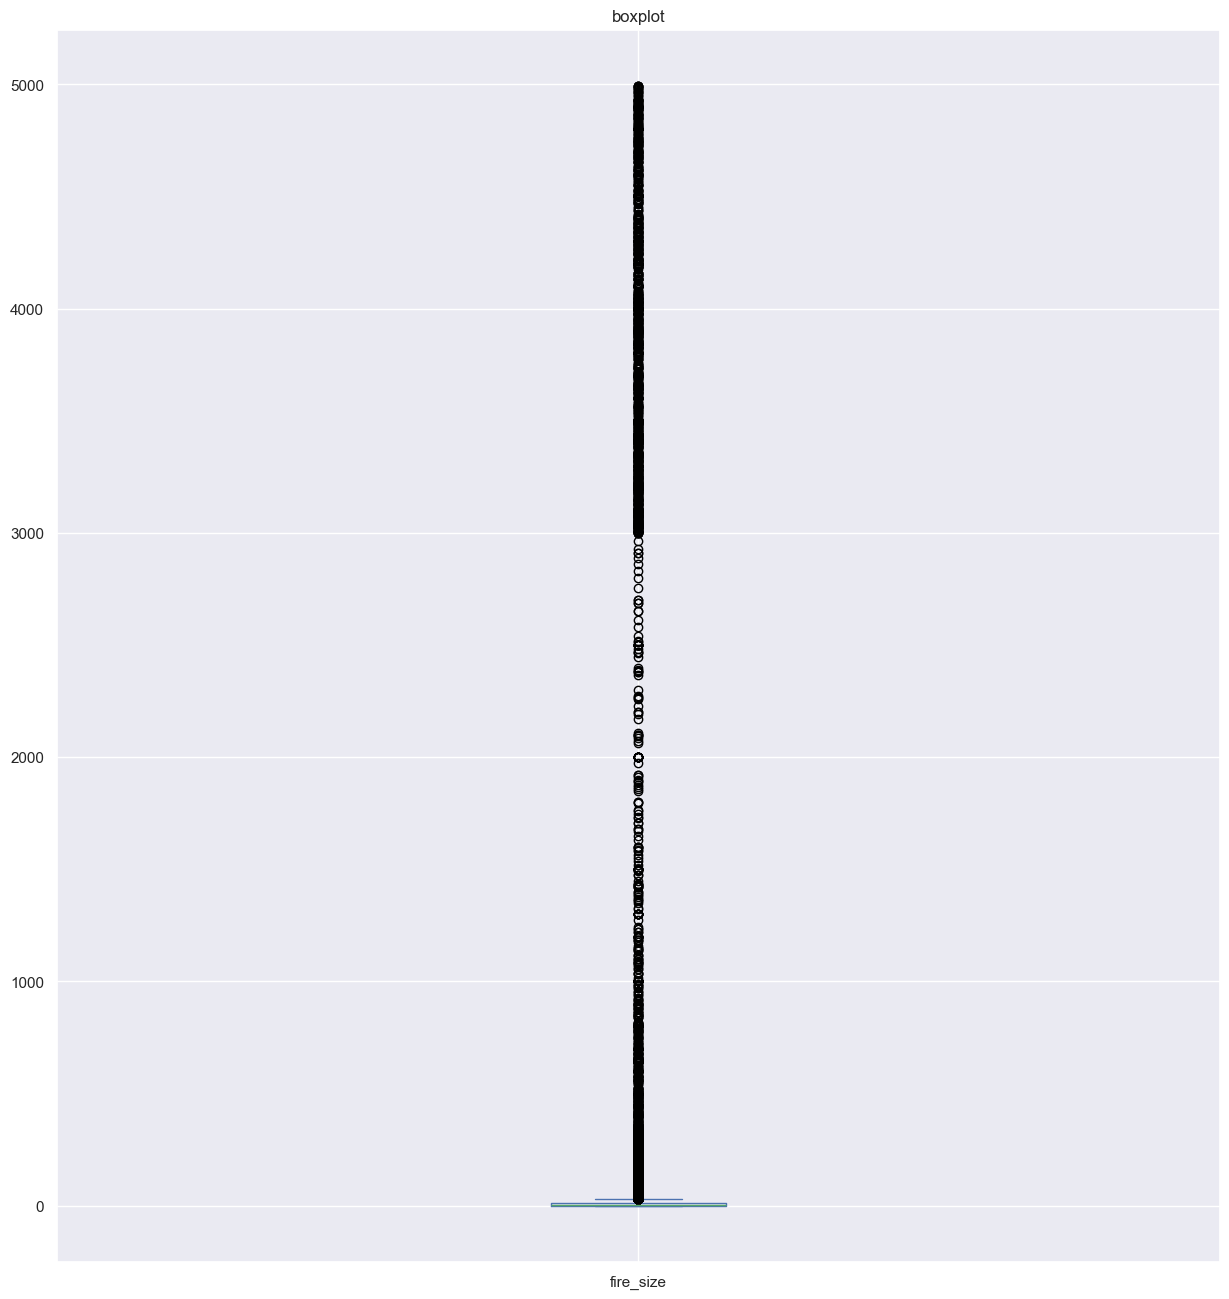

In [26]:
ax = df_adjusted["fire_size"].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [27]:
df_adjusted["Region"].unique()

array([ 8,  4,  1,  9,  2,  5,  3,  6, 10])

In [55]:
class dfByRegion():
    df_r1 = None
    df_r2 = None
    df_r3 = None
    df_r4 = None
    df_r5 = None
    df_r6 = None
    df_r8 = None
    df_r9 = None
    df_r10 = None
    df=None
    dfList = []
    def __init__(self,df):
        self.df = df
        self.splitdf()
        self.dfList = [self.df_r1,self.df_r2,self.df_r3,self.df_r4,self.df_r5,self.df_r6,self.df_r8,self.df_r9,self.df_r10]
    def splitdf(self):
        self.df_r1 = self.df[self.df["Region"]==1]
        self.df_r2 = self.df[self.df["Region"]==2]
        self.df_r3= self.df[self.df["Region"]==3]
        self.df_r4 = self.df[self.df["Region"]==4]
        self.df_r5 = self.df[self.df["Region"]==5]
        self.df_r6 = self.df[self.df["Region"]==6]
        self.df_r8 = self.df[self.df["Region"]==8]
        self.df_r9 = self.df[self.df["Region"]==9]
        self.df_r10 = self.df[self.df["Region"]==10]
    def printSize(self):
        sum1=0
        regions=[]
        regionsize=[]
        for i in range(len(self.dfList)):
            df_temp= self.dfList[i]
            region = i+1
            if(region >=7):
                region +=1
            print(f"dfRegion{(region)} size: {df_temp.shape[0]}")
            regions.append(f"Region{(region)}")
            regionsize.append(df_temp.shape[0])
            sum1+= df_temp.shape[0]
        plt.figure(figsize=(8, 6))
        plt.pie(pd.Series(regionsize), labels= pd.Series(regions), colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightcyan', 'lightseagreen'])
        plt.title("Distribution of fires by Region")
        plt.show()
        return sum1

df_adjusted sizes below
________________________
dfRegion1 size: 1027
dfRegion2 size: 1766
dfRegion3 size: 975
dfRegion4 size: 1482
dfRegion5 size: 2567
dfRegion6 size: 832
dfRegion8 size: 22069
dfRegion9 size: 4293
dfRegion10 size: 247


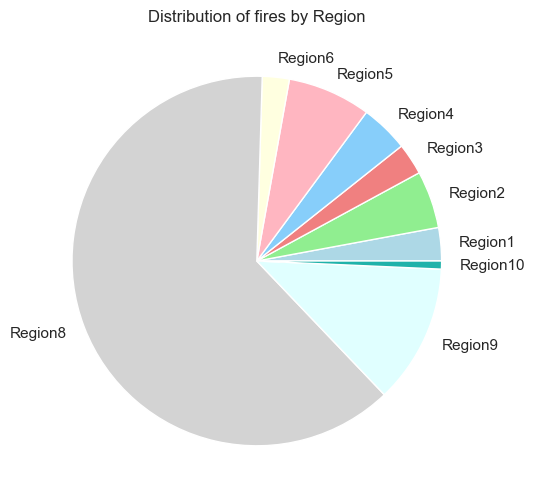

35258 35258



In [56]:
print("df_adjusted sizes below")
print("________________________")
df_adjusted_ByRegion = dfByRegion(df_adjusted)   
regionsTotalsize_adjusted = df_adjusted_ByRegion.printSize()
print(regionsTotalsize_adjusted, df_adjusted_ByRegion.df.shape[0])

print("")




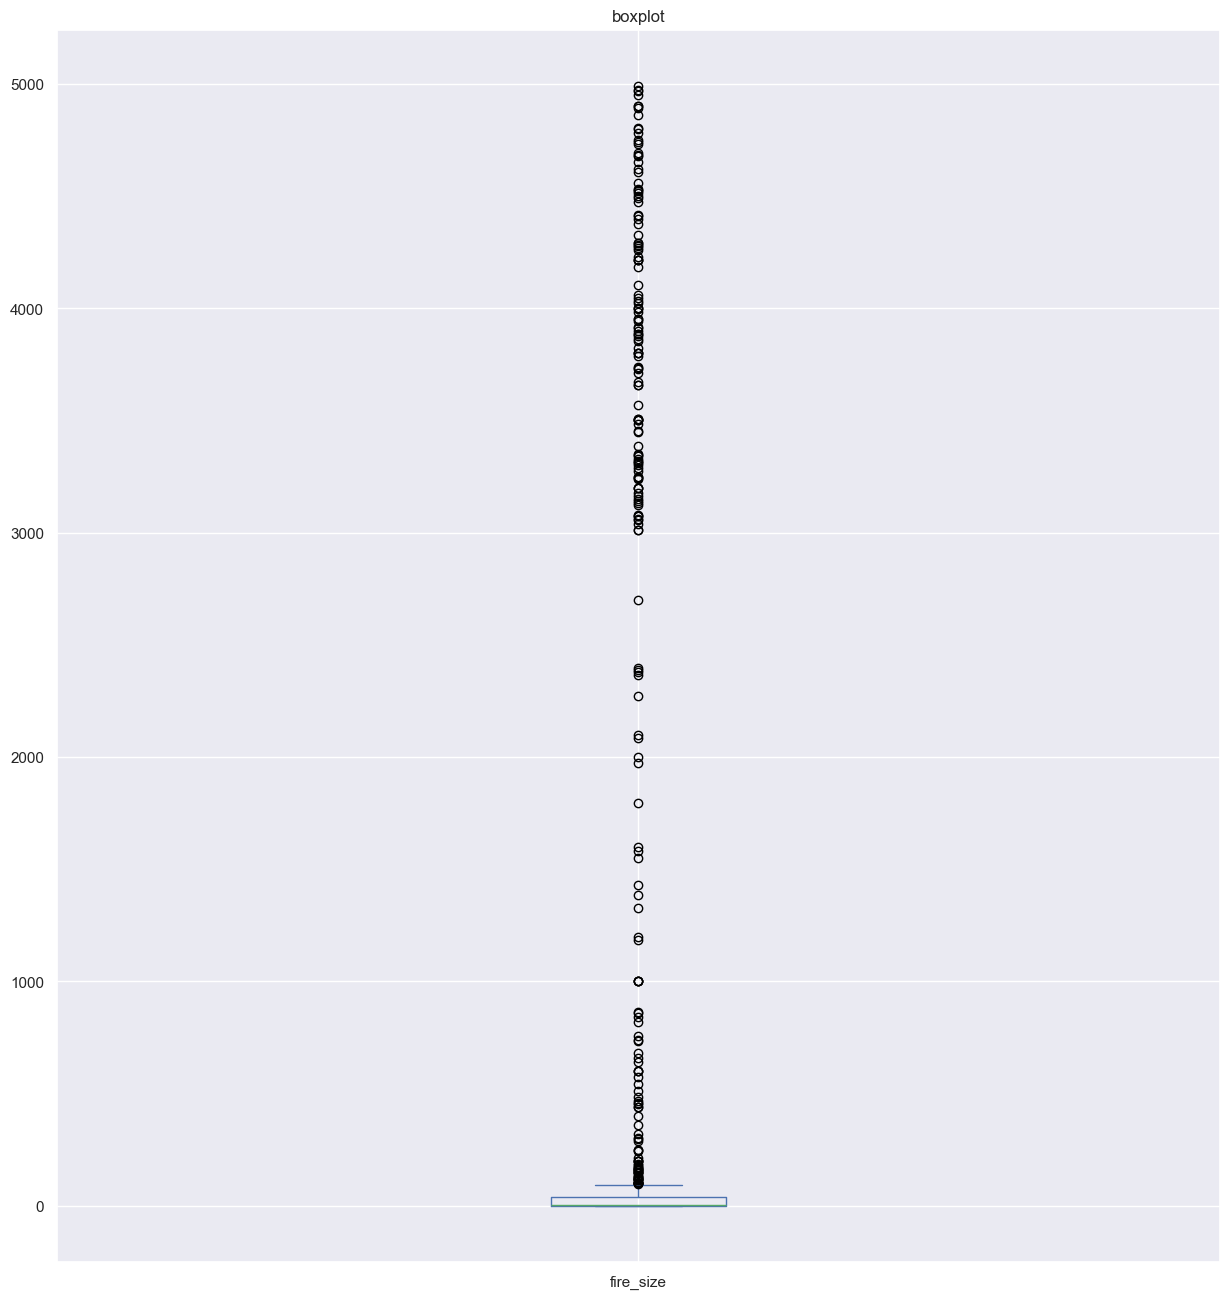

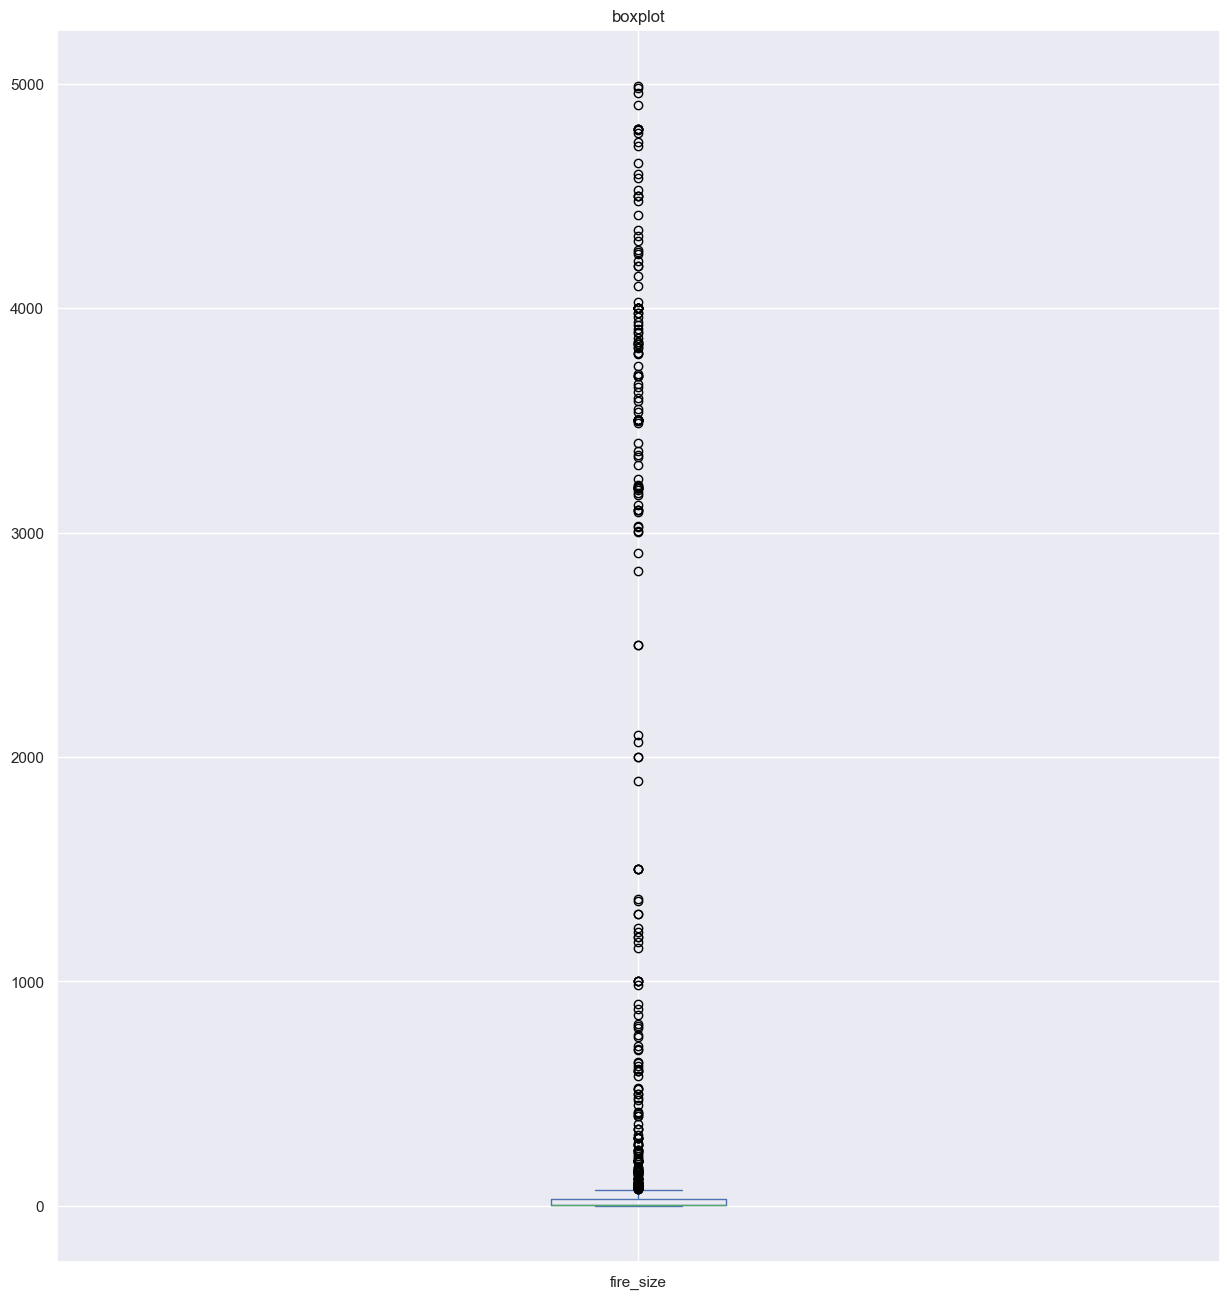

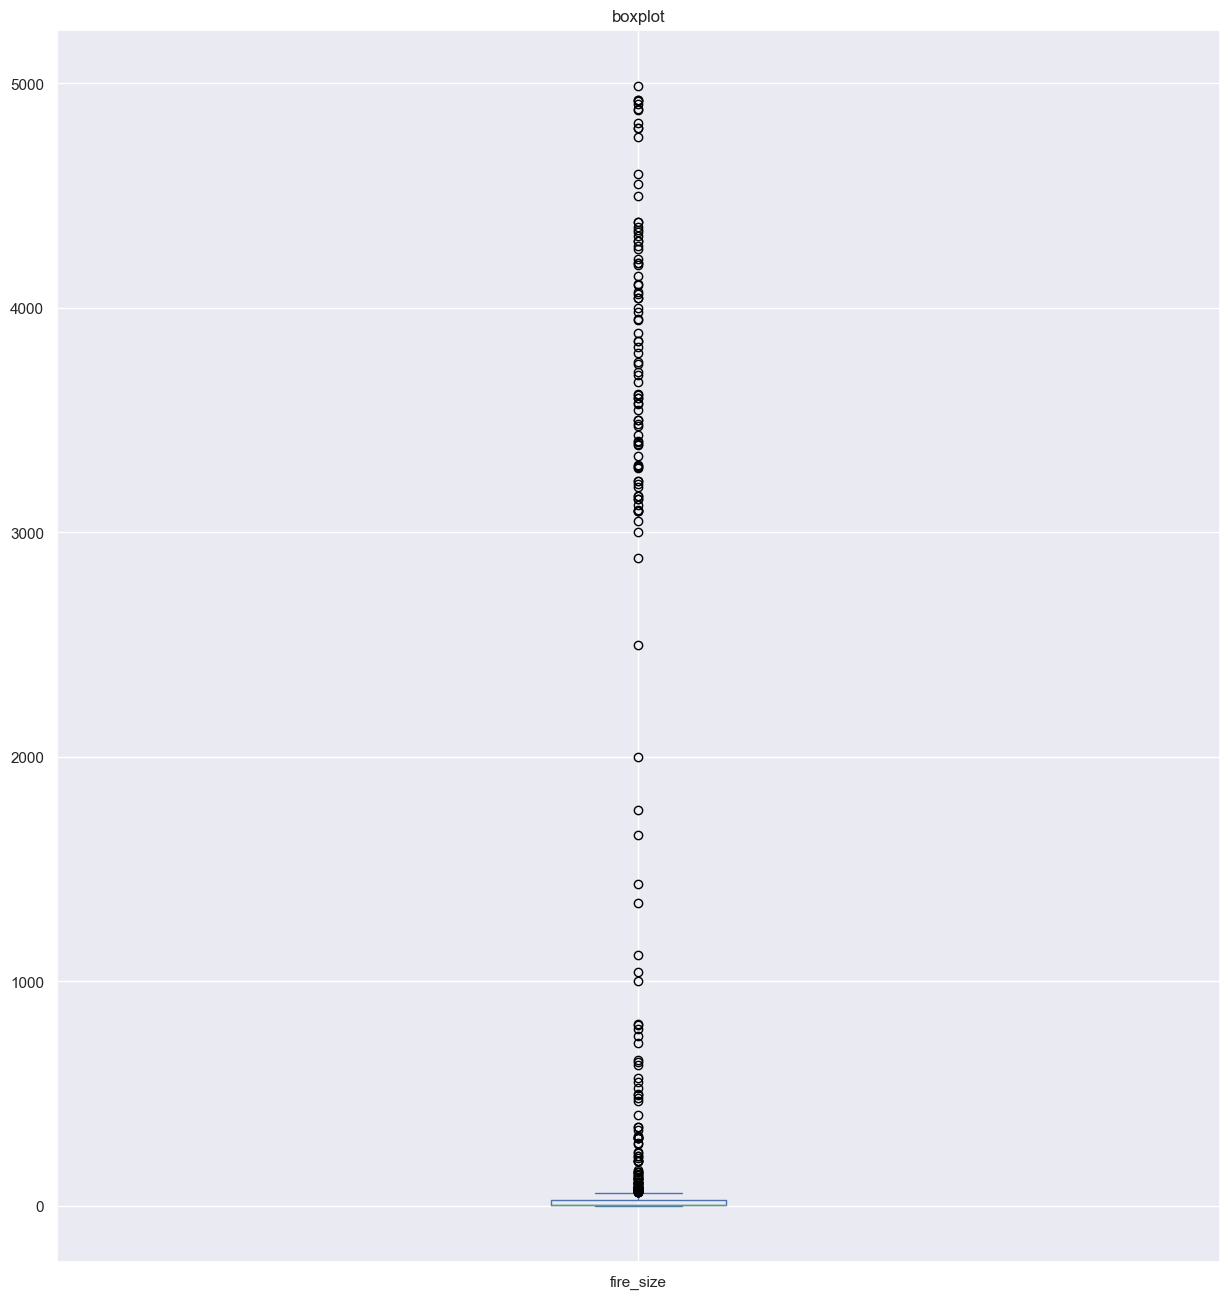

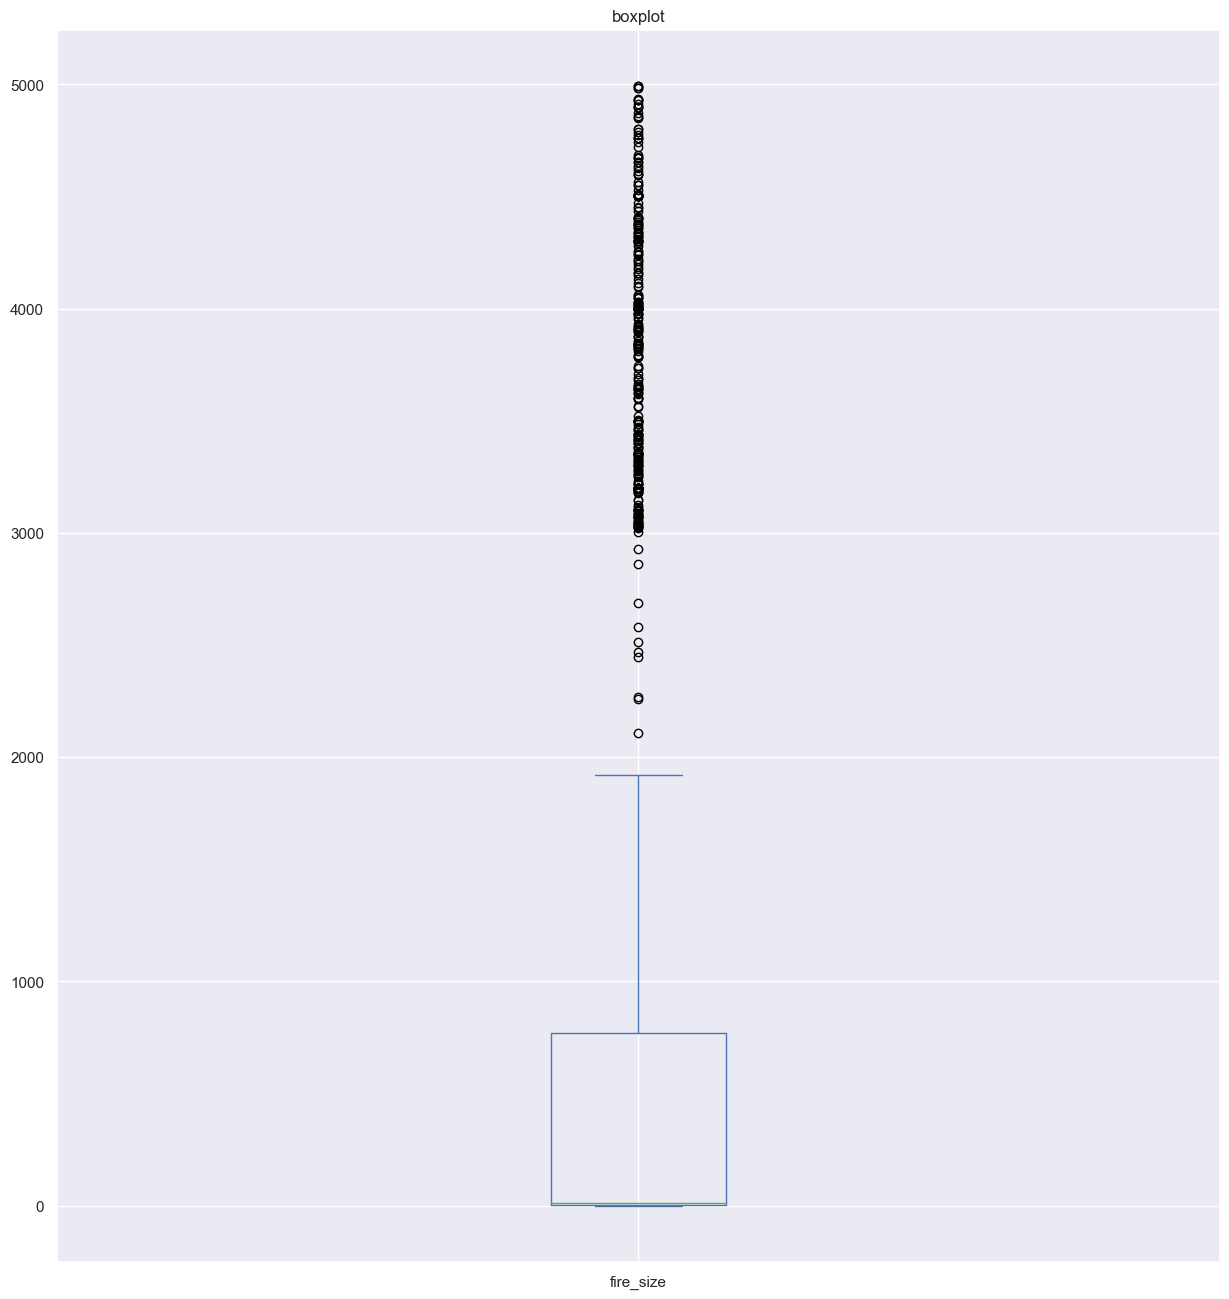

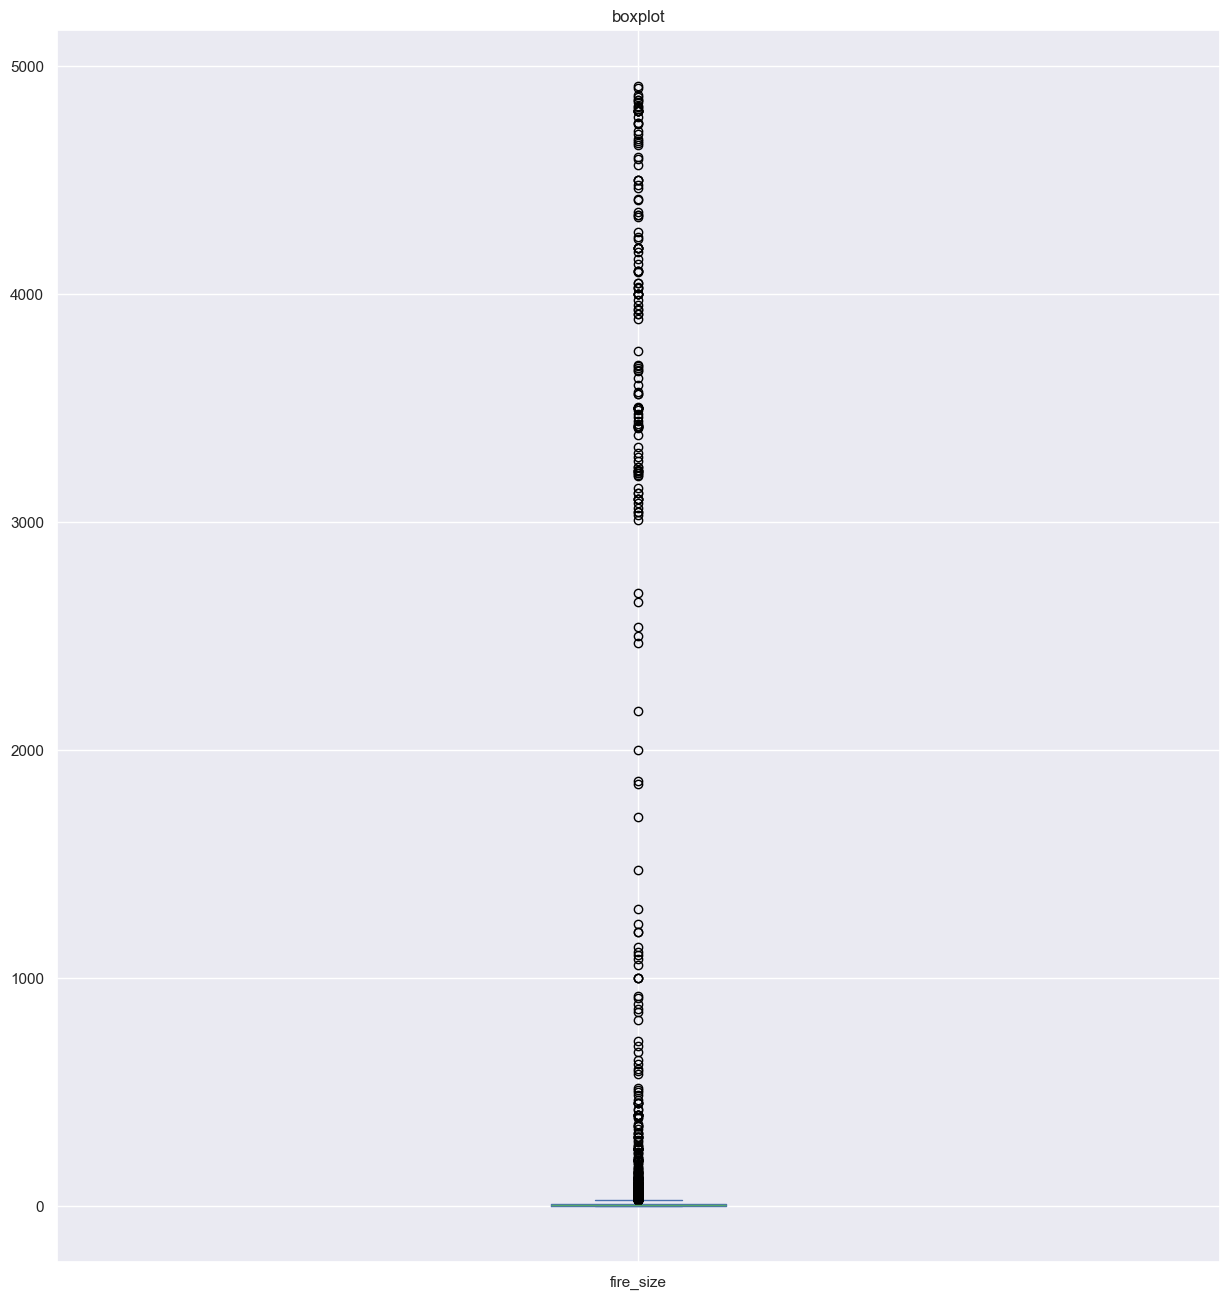

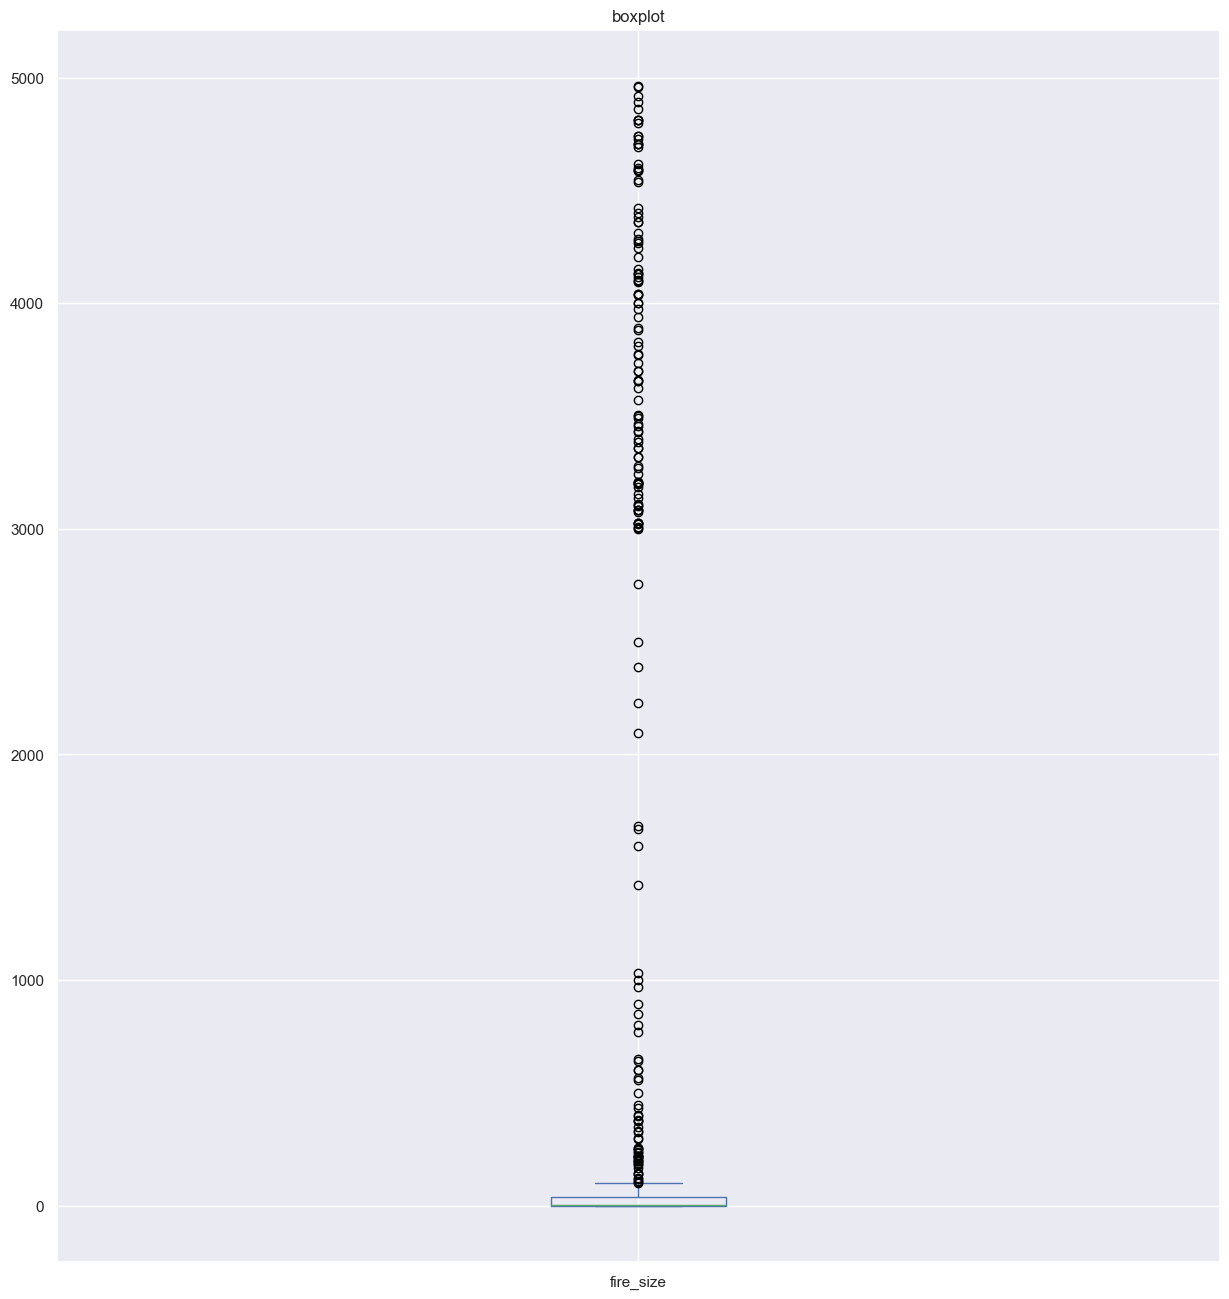

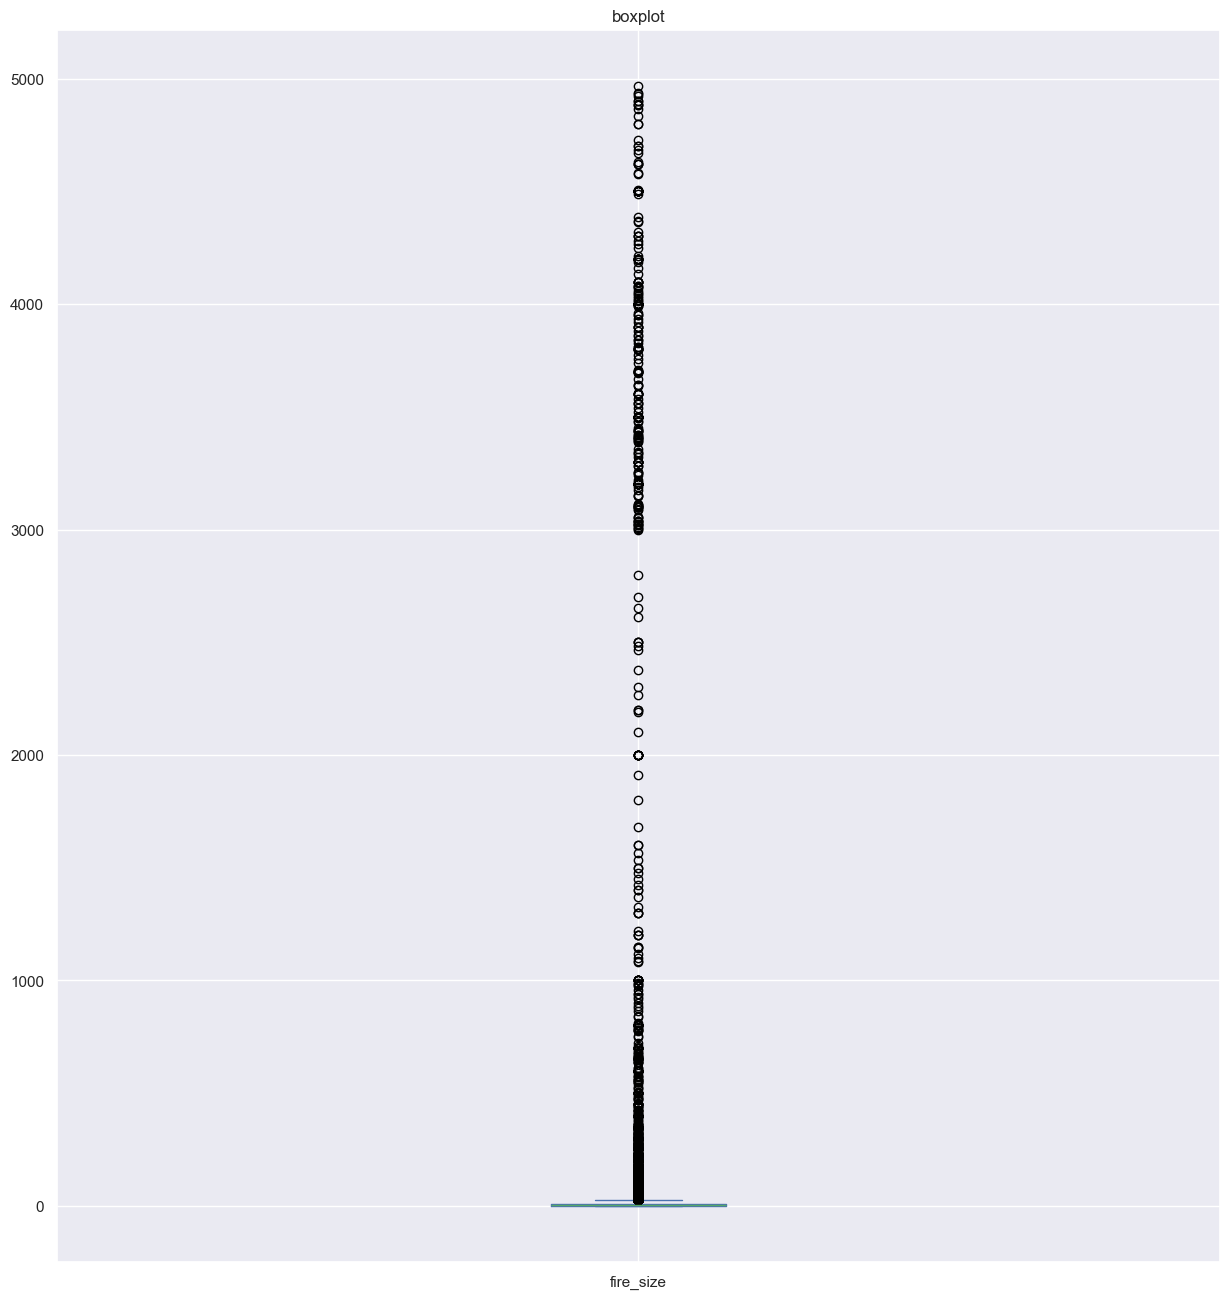

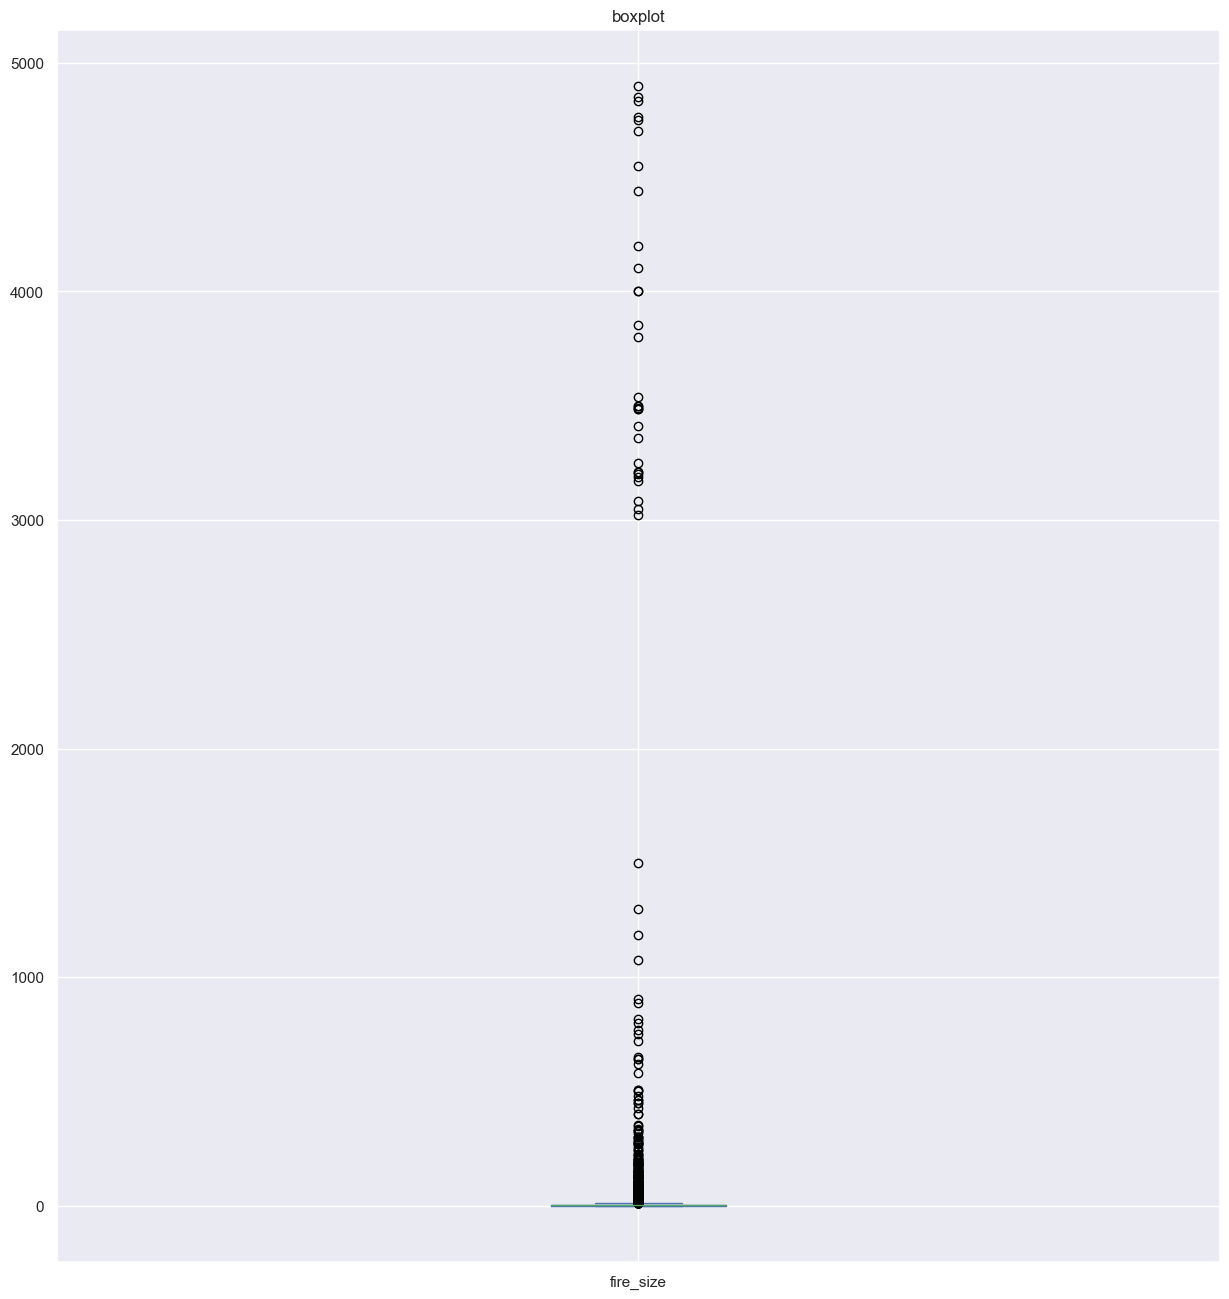

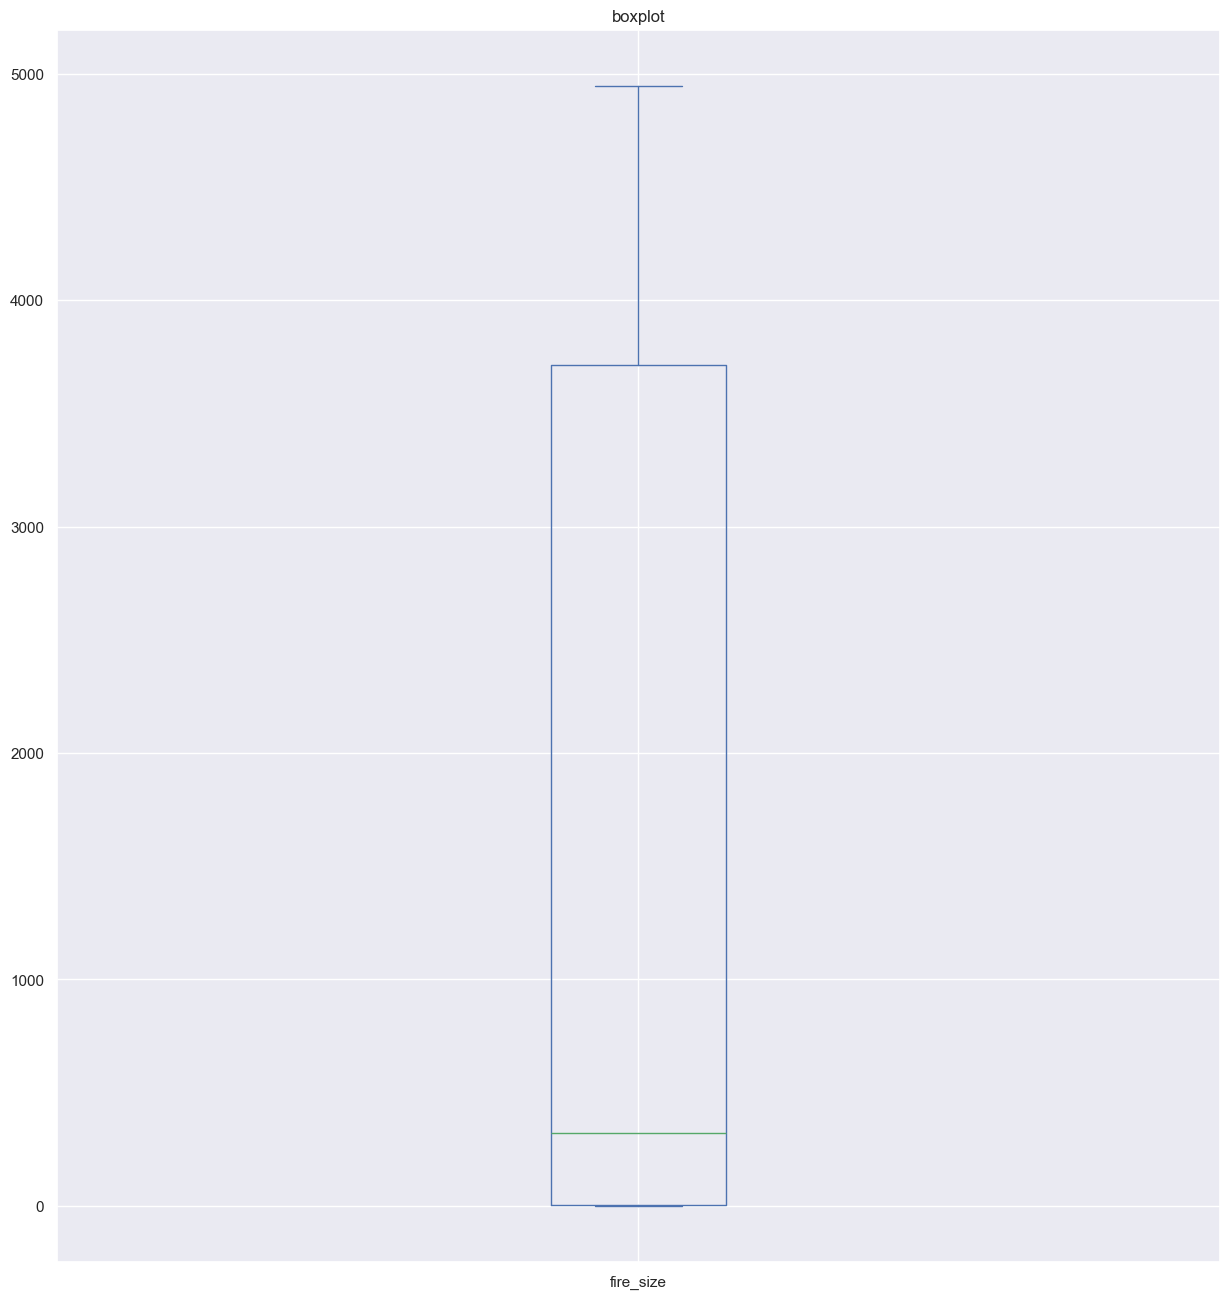

In [30]:
def createBoxPlots(df):
    #print(len(df.dfList))
    boxList=[]
    i=1
    for df_r in df.dfList:
        # Plot the dataframe
        ax = df_r["fire_size"].plot(kind='box', title='boxplot')

        # Display the plot
        plt.show()

createBoxPlots(df_adjusted_ByRegion)

In [31]:
#sanity check 
df_adjusted_ByRegion.df_r1.shape[0]

1027

**For fire size maps, uncomment fig.show() to see the interactive region maps, others refer to imgs in the folder**

In [32]:
def createRegionMapBasedOnFireSize(df,regionNum):
    print("- size: ", df.shape[0])
    fig = px.scatter_geo(df,lat='latitude',lon='longitude',
                      size="fire_size",
                      color = "fire_size_class")
    title = f"Region{regionNum} Map of Fires"
    fig.update_layout(title = title,geo_scope='usa', title_x=0.5)
    
    #fig.show()
    fig.write_image(f"USmapByRegion/USmapFires_Region{regionNum}.png", width=1980, height=1080) #-uncomment to update pictures

In [33]:
print("This can show the most frequent areas of fires over specific region, which could prove useful in predicting...")
for i in range(len(df_adjusted_ByRegion.dfList)):
    regionNum=i+1
    
    if(i>=6):
        regionNum +=1
    print(f"Creating maps of all fires by size: by region {regionNum}")
    dfTemp = df_adjusted_ByRegion.dfList[i]
    createRegionMapBasedOnFireSize(dfTemp,regionNum)

This can show the most frequent areas of fires over specific region, which could prove useful in predicting...
Creating maps of all fires by size: by region 1
- size:  1027
Creating maps of all fires by size: by region 2
- size:  1766
Creating maps of all fires by size: by region 3
- size:  975
Creating maps of all fires by size: by region 4
- size:  1482
Creating maps of all fires by size: by region 5
- size:  2567
Creating maps of all fires by size: by region 6
- size:  832
Creating maps of all fires by size: by region 8
- size:  22069
Creating maps of all fires by size: by region 9
- size:  4293
Creating maps of all fires by size: by region 10
- size:  247


In [34]:
df_adjusted_ByRegion.df.head()

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,day,month,year,stat_cause_encoding,Region
1,3.0,B,Arson,35.038330,-87.610000,TN,2006-12-11,Dec,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355,11,12,2006,1,8
2,60.0,C,Arson,34.947800,-88.722500,MS,2004-02-29,Feb,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544,29,2,2004,1,8
3,1.0,B,Debris Burning,39.641400,-119.308300,NV,2005-06-06,Jun,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,17.804904,4.054982,3.398329,3.671282,3.708198,44.778429,37.140811,35.353846,39.091029,10.4,7.2,0.0,0.0,0.487447,6,6,2005,2,4
6,5.2,B,Debris Burning,31.316978,-83.393649,GA,2009-01-10,Jan,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,16.610281,15.965650,2.000214,1.727202,3.136240,2.287885,79.896679,73.431818,59.811044,71.046514,26.0,0.0,0.0,0.0,0.148904,10,1,2009,2,8
7,1.0,B,Campfire,30.904720,-93.557500,TX,2005-11-12,Nov,10/13/2005,2005,Oct,722820,64017.11754,99999,1984,2020,12,0.1,722820-99999-2005.gz,16.851939,16.997783,20.434783,11.985560,1.331257,1.472949,1.424783,2.148857,72.899478,75.061381,77.924623,70.732911,28.4,27.5,1.2,55.4,0.241894,12,11,2005,4,8


In [35]:
def countCauseEncoding(df):
    ctList=np.zeros(13)
    ct=0
    y= []
    for i in range(len(ctList)):
        ct = sum(1 for causeNum in df.values if causeNum == i)
        #print(i, ct)
        y.append(ct)
    return y
def countCauseEncodingAdjusted(df):
    ctList=np.zeros(7)
    ct=0
    y= []
    for i in range(len(ctList)):
        ct = sum(1 for causeNum in df.values if causeNum == i)
        #print(i, ct)
        y.append(ct)
    return y

<Axes: ylabel='fireCause'>

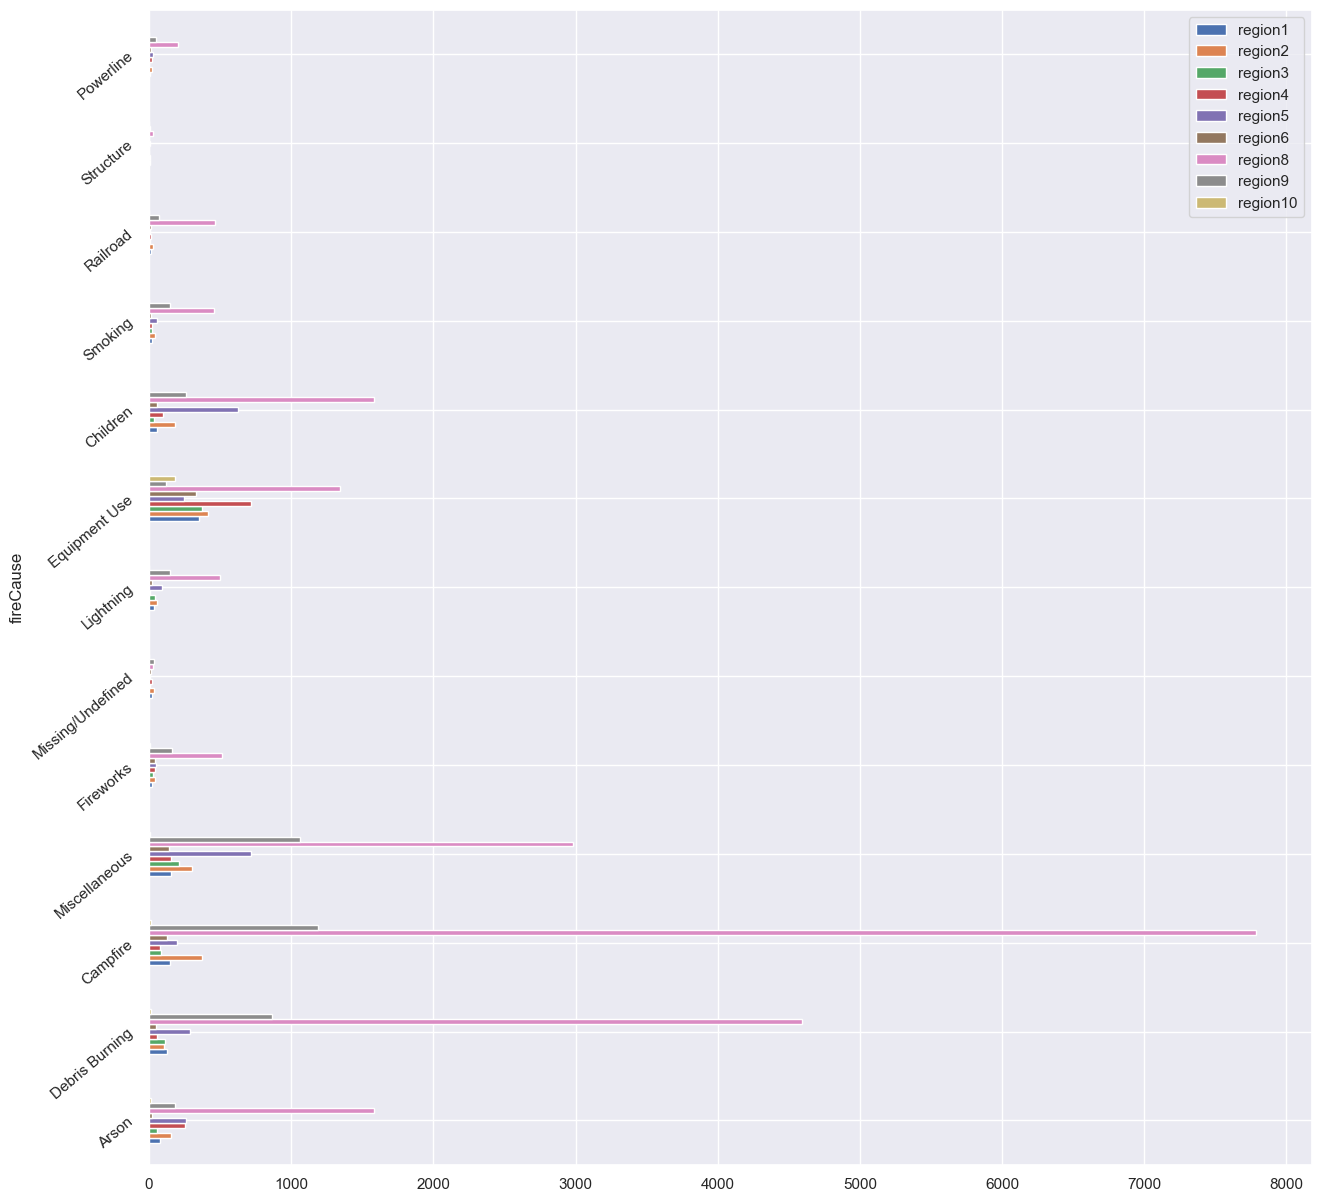

In [36]:
xCauses = df_adjusted_ByRegion.df['stat_cause_encoding'].unique()
yList=[]

for i in range(1,11):
    if(i!=7):
        dfTemp = df_adjusted_ByRegion.df[df_adjusted_ByRegion.df["Region"]==i]
        y =countCauseEncoding(dfTemp['stat_cause_encoding']) #dfTemp['stat_cause_encoding'].value_counts()#.plot(kind='barh',color='blue')
        yList.append(y)
        #print(len(y))

fireCauseCount =[]
xCauses = df_adjusted_ByRegion.df['stat_cause_descr'].unique()
for i in range(len(xCauses)):
    #print(xCauses[i],yList[0][i],yList[1][i],yList[2][i],yList[3][i],yList[4][i],yList[5][i],yList[6][i],yList[7][i],yList[8][i])
    row= (xCauses[i],yList[0][i],yList[1][i],yList[2][i],yList[3][i],yList[4][i],yList[5][i],yList[6][i],yList[7][i],yList[8][i])
    fireCauseCount.append(row)
fireCauseCountDF = pd.DataFrame(fireCauseCount,columns=["fireCause","region1","region2","region3","region4","region5","region6","region8","region9","region10"])        
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
fireCauseCountDF.plot.barh(x = 'fireCause', y = ["region1","region2","region3","region4","region5","region6","region8","region9","region10"], rot = 40,ax=axs)

For classification we had to reduce the amount of labels to increase the accuracy also by combining relevant class labels can lead to better insights by combining Campfire, fireworks, children, smoking, railroad, structure, powerline until one class that will be labeled as unintential human causes we defined as other. And drop the undefined class label as no insight can be gained from that 

In [37]:
df_adjusted.head()

,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,discovery_month,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness,day,month,year,stat_cause_encoding,Region
1,3.0,B,Arson,35.038330,-87.610000,TN,2006-12-11,Dec,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355,11,12,2006,1,8
2,60.0,C,Arson,34.947800,-88.722500,MS,2004-02-29,Feb,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544,29,2,2004,1,8
3,1.0,B,Debris Burning,39.641400,-119.308300,NV,2005-06-06,Jun,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,17.804904,4.054982,3.398329,3.671282,3.708198,44.778429,37.140811,35.353846,39.091029,10.4,7.2,0.0,0.0,0.487447,6,6,2005,2,4
6,5.2,B,Debris Burning,31.316978,-83.393649,GA,2009-01-10,Jan,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,16.610281,15.965650,2.000214,1.727202,3.136240,2.287885,79.896679,73.431818,59.811044,71.046514,26.0,0.0,0.0,0.0,0.148904,10,1,2009,2,8
7,1.0,B,Campfire,30.904720,-93.557500,TX,2005-11-12,Nov,10/13/2005,2005,Oct,722820,64017.11754,99999,1984,2020,12,0.1,722820-99999-2005.gz,16.851939,16.997783,20.434783,11.985560,1.331257,1.472949,1.424783,2.148857,72.899478,75.061381,77.924623,70.732911,28.4,27.5,1.2,55.4,0.241894,12,11,2005,4,8


In [38]:
from utils import reduce_cause_labels
cause_encoded_small = {
    'Arson':0, 
    'Debris Burning':1, 
    'Miscellaneous':2,
    'Lightning':3, 
    'Equipment Use':4,
    'Other':5
}
df_adjusted_class = df_adjusted.drop(columns =["stat_cause_encoding"])
df_adjusted_class = reduce_cause_labels(df_adjusted_class)
df_adjusted_class['stat_cause_encoding'] = df_adjusted_class['stat_cause_descr'].apply(lambda x: cause_encoded_small[x]).astype('int')


/Users/vamsigontu/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/Users/vamsigontu/Documents/Indep/Project_repo/utils.py:117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



df_adjusted sizes below
________________________
dfRegion1 size: 947
dfRegion2 size: 1614
dfRegion3 size: 919
dfRegion4 size: 1229
dfRegion5 size: 2304
dfRegion6 size: 813
dfRegion8 size: 20486
dfRegion9 size: 4112
dfRegion10 size: 235


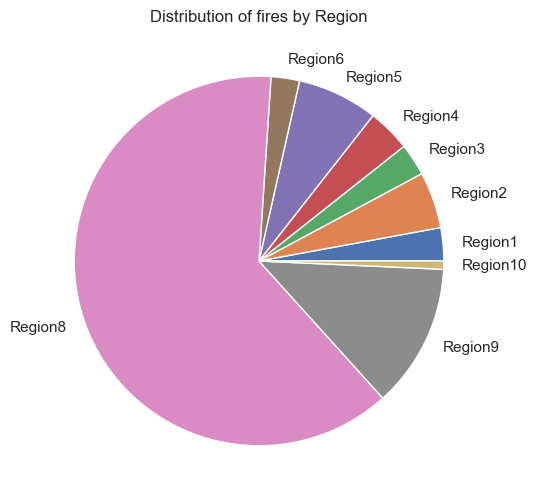

32659 32659



In [39]:
#from utils import reduce_cause_labels
# reducing total amount of causes of fires

#df_adjusted = reduce_cause_labels(df_adjusted)
#df_adjusted['stat_cause_descr'].unique()

print("df_adjusted sizes below")
print("________________________")
df_cause_ByRegion = dfByRegion(df_adjusted_class)   
regionsTotalsize_adjusted = df_cause_ByRegion.printSize()
print(regionsTotalsize_adjusted, df_cause_ByRegion.df.shape[0])
print("")

Arson 126 108 112 58 288 51 4593 866 11
Debris Burning 144 373 81 74 194 125 7788 1188 16
Other 152 304 212 156 720 140 2979 1063 8
Miscellaneous 352 416 370 714 244 331 1343 117 184
Lightning 54 182 37 99 626 54 1585 260 1
Equipment Use 119 231 107 128 232 112 2198 618 15


<Axes: ylabel='fireCause'>

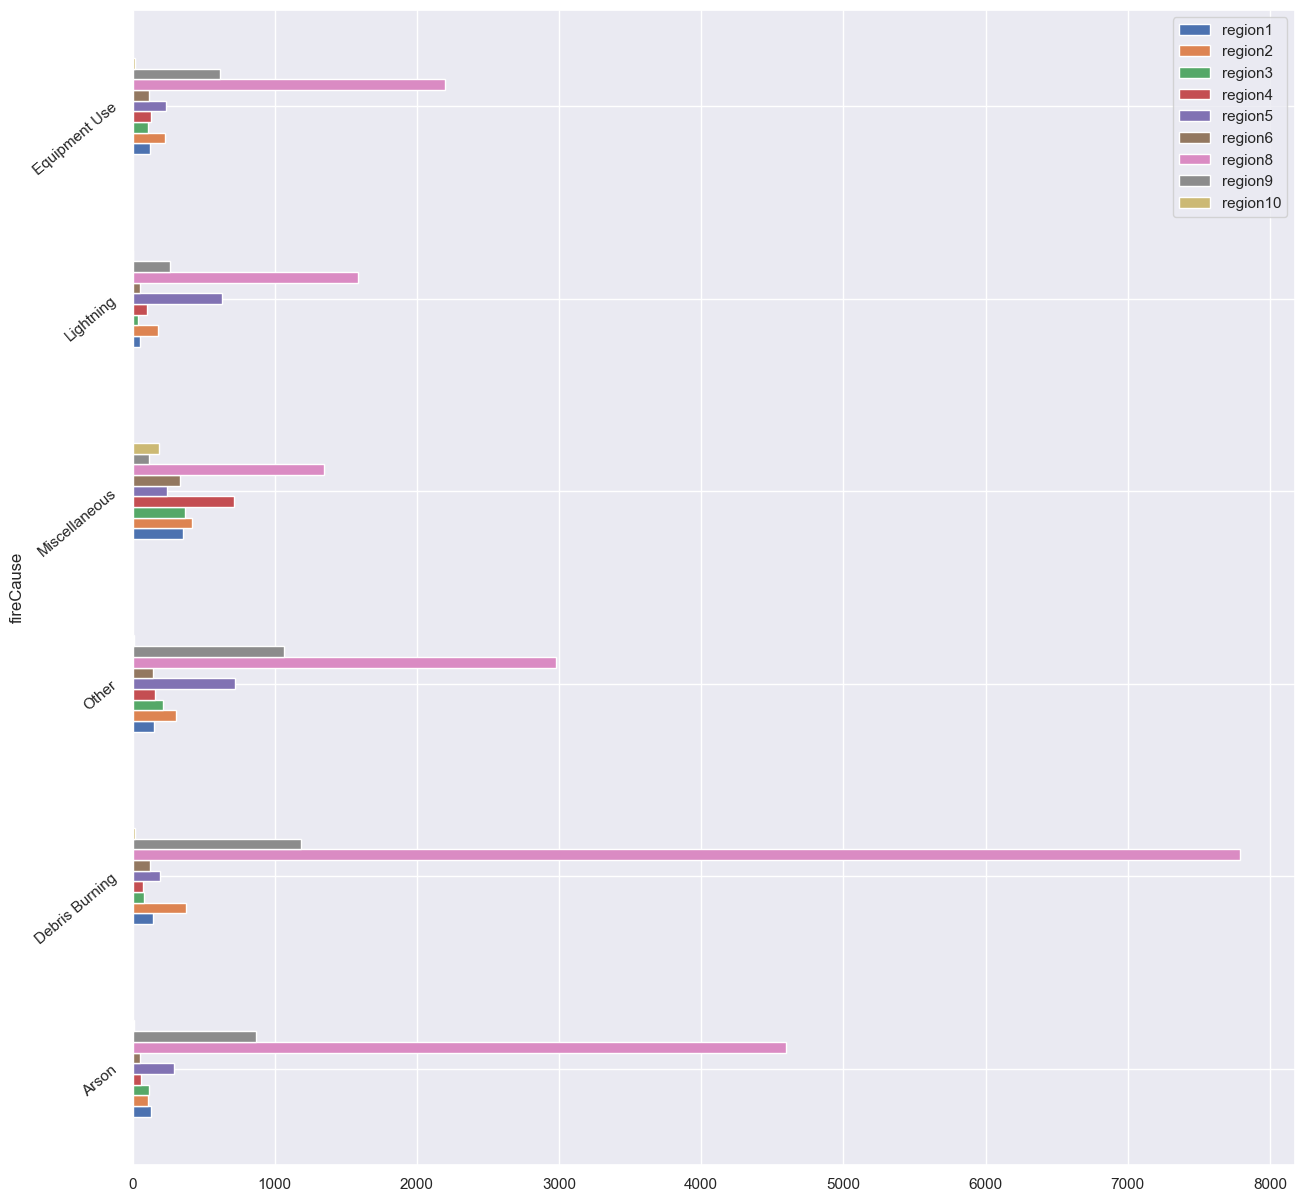

In [40]:
xCauses = df_cause_ByRegion.df['stat_cause_encoding'].unique()
yList=[]

for i in range(1,11):
    if(i!=7):
        dfTemp = df_cause_ByRegion.df[df_cause_ByRegion.df["Region"]==i]
        y =countCauseEncodingAdjusted(dfTemp['stat_cause_encoding']) #dfTemp['stat_cause_encoding'].value_counts()#.plot(kind='barh',color='blue')
        yList.append(y)
        #print(len(y))

fireCauseCount =[]
xCauses = df_cause_ByRegion.df['stat_cause_descr'].unique()
for i in range(len(xCauses)):
    print(xCauses[i],yList[0][i],yList[1][i],yList[2][i],yList[3][i],yList[4][i],yList[5][i],yList[6][i],yList[7][i],yList[8][i])
    row= (xCauses[i],yList[0][i],yList[1][i],yList[2][i],yList[3][i],yList[4][i],yList[5][i],yList[6][i],yList[7][i],yList[8][i])
    fireCauseCount.append(row)
fireCauseCountDF = pd.DataFrame(fireCauseCount,columns=["fireCause","region1","region2","region3","region4","region5","region6","region8","region9","region10"])        
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
fireCauseCountDF.plot.barh(x = 'fireCause', y = ["region1","region2","region3","region4","region5","region6","region8","region9","region10"], rot = 40,ax=axs)

**Normalize features**

In [41]:
def normalizeFeatures(featureColumns, df):
    result= df
    
    for df_r in result.dfList:
        for feature in featureColumns:
            max_value = df_r[feature].max()
            min_value = df_r[feature].min()
            print(min_value,max_value)
            df_r[feature] = (df_r[feature] - min_value) / (max_value - min_value)
    
    
    for feature in featureColumns:
        max_value = result.df[feature].max()
        min_value = result.df[feature].min()
        print(min_value,max_value)
        result.df[feature] = (result.df[feature] - min_value) / (max_value - min_value)
    return result   
        #print(df_r[feature].unique())
        #break
df_adjusted_ByRegion = normalizeFeatures(["fire_size"],df_adjusted_ByRegion)  

0.6 4992.0
0.51 4991.9
0.56 4990.0
0.52 4994.0
0.55 4913.0
0.6 4964.0
0.51 4969.0
0.52 4900.0
0.6 4947.0
0.51 4994.0


/var/folders/16/qnwjsjfn5011fpzs33fhppqw0000gn/T/ipykernel_39551/3529783652.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Save python object to file for other notebooks and models for prediction**

dfRegion1 size: 1027
dfRegion2 size: 1766
dfRegion3 size: 975
dfRegion4 size: 1482
dfRegion5 size: 2567
dfRegion6 size: 832
dfRegion8 size: 22069
dfRegion9 size: 4293
dfRegion10 size: 247


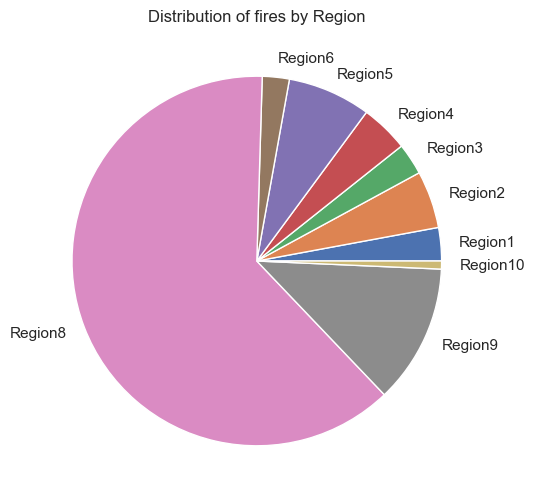

35258 35258



In [42]:
regionsTotalsize_adjusted = df_adjusted_ByRegion.printSize()
print(regionsTotalsize_adjusted, df_adjusted_ByRegion.df.shape[0])
print("")

In [43]:
import pickle
#filehandler = open("regionDfObject.obj", 'wb',encoding='utf-8') 
#pickle.dump(df_adjusted_ByRegion, filehandler)
def pickleAllRegionDf(df):
    
    for i in range(len(df.dfList)):
        df_r = df.dfList[i]
        regionNum=i+1
        if(regionNum>=7):
            regionNum +=1
        df_r.to_pickle(f'df_r{regionNum}.pkl')
pickleAllRegionDf(df_adjusted_ByRegion)

df_adjusted.to_pickle("df_ByRegion.pkl")

## Load DF 

In [46]:
from loadDFRegion import getDF
df,dfRegionList = getDF()

Grabbing region 1 dataframe...
Grabbing region 2 dataframe...
Grabbing region 3 dataframe...
Grabbing region 4 dataframe...
Grabbing region 5 dataframe...
Grabbing region 6 dataframe...
Grabbing region 8 dataframe...
Grabbing region 9 dataframe...
Grabbing region 10 dataframe...


In [47]:
#Sanity Check !!
sum1=0
ct=1
for dftemp in dfRegionList:
    if(ct>=7):
        ct+=1
    #print(ct, dftemp.size)
    sum1+= dftemp.shape[0]
print(df.shape[0], sum1)
assert(sum1==df.shape[0])

35258 35258


## Setting up Experiments

In [48]:
def experimentCreation_FireSizePrediction(df,yTarget):
    """Function return all experiments splitting data by yTarget name: 
        regression - fire_size
        classification - fire_cause
    """
    
    # Experiment 1 
    """
    - which will select all teh available  features from the dataset
    -Features included - variables related to Vegetation,Temperature, Humidity, Wind, Precipitation, cause of  fire, longitude and latitude
    - we have 34 variables  for x-variables  to which we are gonna target one y-variable which is fire_size
    - selecting features and target variables"""
    X1 = df[['Vegetation','remoteness','latitude','Temp_pre_30','Temp_pre_15','Temp_pre_7','Temp_cont','Wind_pre_30','Wind_pre_15','Wind_pre_7','Wind_cont','Hum_pre_30', 'Hum_pre_15','Hum_pre_7','Hum_cont','Prec_pre_30','Prec_pre_15','Prec_pre_7','Prec_cont','stat_cause_encoding', 'longitude']]
    #X1 = df[['Vegetation_4','remoteness', 'Vegetation_9','Vegetation_12','Vegetation_14','Vegetation_15','Vegetation_16','latitude','Temp_pre_30','Temp_pre_15','Temp_pre_7','Temp_cont','Wind_pre_30','Wind_pre_15','Wind_pre_7','Wind_cont','Hum_pre_30', 'Hum_pre_15','Hum_pre_7','Hum_cont','Prec_pre_30','Prec_pre_15','Prec_pre_7','Prec_cont','Cause_Debris Burning','Cause_Equipment Use','Cause_Fireworks','Cause_Lightning','Cause_Miscellaneous','Cause_Missing/Undefined','Cause_Powerline','Cause_Railroad','Cause_Smoking','Cause_Structure', 'longitude']]
    # X1 = df[['Vegetation_4','Vegetation_9','Vegetation_12','Vegetation_14','Vegetation_15','Vegetation_16','latitude','Temp_pre_30','Temp_pre_15','Temp_pre_7','Temp_cont','Wind_pre_30','Wind_pre_15','Wind_pre_7','Wind_cont','Hum_pre_30', 'Hum_pre_15','Hum_pre_7','Hum_cont','Prec_pre_30','Prec_pre_15','Prec_pre_7','Prec_cont','Cause_Debris Burning','Cause_Equipment Use','Cause_Fireworks','Cause_Lightning','Cause_Miscellaneous','Cause_Missing/Undefined','Cause_Powerline','Cause_Railroad','Cause_Smoking','Cause_Structure', 'longitude']]

    y = df[yTarget] 

    #train test split
    X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
    df1 = [X1_train, X1_test, y_train, y_test]
    #######################
    #Experiment type 2 
    """-Include only long, lat, vegetation, cause and pre- weather data, without cont
    - which is the data set where I removed the variables  on which the fire is  containining on the day
    - removed 4 variables
    - selecting features and target variables"""
    X2 = df[['Vegetation','latitude','Temp_pre_30','Temp_pre_15','Temp_pre_7','Wind_pre_30','Wind_pre_15','Wind_pre_7','Hum_pre_30', 'Hum_pre_15','Hum_pre_7','Prec_pre_30','Prec_pre_15','Prec_pre_7','stat_cause_encoding', 'longitude']]
    #X2 = df[['Vegetation_4','Vegetation_9','Vegetation_12','Vegetation_14','Vegetation_15','Vegetation_16','latitude','Temp_pre_30','Temp_pre_15','Temp_pre_7','Wind_pre_30','Wind_pre_15','Wind_pre_7','Hum_pre_30', 'Hum_pre_15','Hum_pre_7','Prec_pre_30','Prec_pre_15','Prec_pre_7','Cause_Debris Burning','Cause_Equipment Use','Cause_Fireworks','Cause_Lightning','Cause_Miscellaneous','Cause_Missing/Undefined','Cause_Powerline','Cause_Railroad','Cause_Smoking','Cause_Structure', 'longitude']]
    y = df[yTarget]

    #train test split
    X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
    df2 = [X2_train, X2_test, y_train, y_test]
    ########################
    #Experiment 3 
    #- Including only lat, long and weather pre- data
    #When I have done the feature importance, I got to know that the cause and vegetation is not that important, so here we removed the 2 
    #  selecting features and target variables
    X3 = df[['latitude','longitude','Temp_pre_30','Temp_pre_15','Temp_pre_7','Wind_pre_30','Wind_pre_15','Wind_pre_7','Hum_pre_30', 'Hum_pre_15','Hum_pre_7','Prec_pre_30','Prec_pre_15','Prec_pre_7']]
    y = df[yTarget]

    #train test split
    X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)
    df3 = [X3_train, X3_test, y_train, y_test]
    
    ########################
    #Experiment 4 
    #with experiment 1 data with normalization
    # have done the minMax normalization for the experiment 1 data frame.
    df_4 = df[['Vegetation','latitude','Temp_pre_30','Temp_pre_15','Temp_pre_7','Temp_cont','Wind_pre_30','Wind_pre_15','Wind_pre_7','Wind_cont','Hum_pre_30', 'Hum_pre_15','Hum_pre_7','Hum_cont','Prec_pre_30','Prec_pre_15','Prec_pre_7','Prec_cont','stat_cause_encoding', 'longitude']]
    names = df_4.columns

    # normalizing data
    df_4 = preprocessing.normalize(df_4)
    scaled_df = pd.DataFrame(df_4, columns=names)

    #train test split
    X4_train, X4_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)
    df4 = [X4_train, X4_test, y_train, y_test]
    
    return [df1,df2,df3,df4]

## Running all regression models on all experiments for Prediction on Fire Size

In [52]:
from utils import run_all_regressors
regionExperimentDict = {}
for i in range(len(dfRegionList)):
    dfRegion = dfRegionList[i]
    regionCount =i+1
    if(regionCount>=7):
        regionCount+=1
    
    experimentList = experimentCreation_FireSizePrediction(dfRegion,"fire_size")
    print(f"\n\n____Running all experiments for Region {regionCount}____")
    print("____________________________________________")
    print("____________________________________________")
    experimentListOfDictionaries = []
    for i in range(len(experimentList)):
        #if(i not in [1,2,3]):
        experiment=experimentList[i]
        print(f"\n--------------Experiment {i+1}--------------")
        #print(experiment[0].shape,experiment[1].shape,experiment[2].shape,experiment[3].shape)
        regressorDict = run_all_regressors(experiment[0],experiment[2],experiment[1],experiment[3])
        if(i not in [1,2,3]):
            experimentListOfDictionaries.append(regressorDict)
    print("____________________________________________")
    
    regionExperimentDict[regionCount]= experimentListOfDictionaries
    



____Running all experiments for Region 1____
____________________________________________
____________________________________________

--------------Experiment 1--------------
Running RandomForestRegressor
Score on training data: 0.9836624025551448
Score on testing data: 0.8628333008246802
Mean Absolute Error:  0.04018186591393507
R Squared:  0.8628333008246802

Running GradientBoostingRegressor
Score on training data: 0.9743691746910226
Score on testing data: 0.8593958993601911
Mean Absolute Error:  0.038745358023994814
R Squared:  0.8593958993601911

Running DecisionTreeRegressor
Score on training data: 0.9999999760149556
Score on testing data: 0.8433157478025147
Mean Absolute Error:  0.03495205928955085
R Squared:  0.8433157478025147

Running ExtraTreesRegressor
Score on training data: 0.9999999760149556
Score on testing data: 0.8638287276536806
Mean Absolute Error:  0.03770194443238487
R Squared:  0.8638287276536806

Running SVR
Score on training data: 0.023669598559043825
Score

In [ ]:
for i in range(9):
    regionCt = i+1
    if(regionCt>=7):
        regionCt+=1
    print(f"Results from Region {regionCt}")
    print(regionExperimentDict[regionCt])

In [ ]:
def createRegionDFResults(regressorDict):
    dfRegressionResults = pd.DataFrame(columns=['ModelName','TrainScore','TestScore','MAE','R^2'])
    for key in regressorDict.keys():
        #print(key)
        resultList = regressorDict[key]
        new_row = {'ModelName':key, 'TrainScore':resultList[0], 'TestScore':resultList[1], 'MAE':resultList[2] , 'R^2':resultList[3]}
        
        dfRegressionResults = dfRegressionResults.append(new_row, ignore_index=True)
    return dfRegressionResults

In [ ]:
regionRegressionList=[]
for i in range(1,len(regionExperimentDict)+1):
    
    if(i>=7):
        i+=1
    #print(i)
    regionRegressionResults = createRegionDFResults(regionExperimentDict[i][0])
    regionRegressionList.append(regionRegressionResults)

In [ ]:
for i in range(len(regionRegressionList)):
    dfTemp = regionRegressionList[i]
    regionNum= i+1
    if(regionNum>=7):
        regionNum+=1
    print(f"\nRegion {regionNum}")
    print(dfTemp.head())

In [ ]:
"""dfRegion1 size: 1027
dfRegion2 size: 1766
dfRegion3 size: 975
dfRegion4 size: 1482
dfRegion5 size: 2567
dfRegion6 size: 832
dfRegion8 size: 22069
dfRegion9 size: 4293
dfRegion10 size: 247"""
#TODO select best model and put in region table
dfRegionModelResults = pd.DataFrame(columns=['Region','RegionSize','ModelName','MAE','R^2'])
r1 = {'Region':1 ,'ModelName':"RandomForestRegressor", 'RegionSize':1027,'MAE':0.038844   , 'R^2':0.864012}
r2 = {'Region':2 ,'ModelName':"ExtraTreesRegressor", 'RegionSize':1766,'MAE':0.035026  , 'R^2':0.817728}
r3 = {'Region':3 ,'ModelName':"ExtraTreesRegressor", 'RegionSize':975,'MAE':0.032393   , 'R^2':0.903682}
r4 = {'Region':4 ,'ModelName':"ExtraTreesRegressor", 'RegionSize':1482,'MAE':0.075709   , 'R^2':0.811049}
r5 = {'Region':5 ,'ModelName':"GradientBoostingRegressor",'RegionSize':2567, 'MAE':0.020157  , 'R^2':0.901066}
r6 = {'Region':6 ,'ModelName':"ExtraTreesRegressor", 'RegionSize':832,'MAE':0.046512   , 'R^2':0.890339}
r8 = {'Region':8 ,'ModelName':"RandomForestRegressor", 'RegionSize':22069,'MAE':0.007910     , 'R^2':0.888664}
r9 = {'Region':9 ,'ModelName':"ExtraTreesRegressor ", 'RegionSize':247,'MAE':0.006403    , 'R^2':0.877449}
r10 = {'Region':10 ,'ModelName':"GradientBoostingRegressor", 'RegionSize':1027,'MAE':0.093626, 'R^2':0.879954}
rowList = [r1,r2,r3,r4,r5,r6,r8,r9,r10]
for row in rowList: 
    dfRegionModelResults = dfRegionModelResults.append(row, ignore_index=True)

In [ ]:
dfRegionModelResults.head(10)

### Classifying on forest cause with adjusted labels for causes 12->5
Aside: More work is needed to get the correct number of classes as currently results seem to high as most models are recieving 100 % accuracy

In [ ]:
from utils import run_all_classifiers
def exp1(df):
    X = df[['latitude', 'longitude', 'Vegetation', 'Temp_cont', 'Wind_cont', 'Hum_cont', 'Prec_cont', 'remoteness']]
    Y = df['stat_cause_encoding']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=50)
    return X_train,X_test,y_train,y_test



def runClassifiers(df, dfRegionList):
    
    regionClassifierDict={}
    for i in range(len(dfRegionList)):
        dfRegion = dfRegionList[i]
        #print(dfRegion)
        regionCount =i+1
        if(regionCount>=7):
            regionCount+=1
        X_train,X_test,y_train,y_test = exp1(dfRegion)
        #print(X_train.shape)
        #print(X_test.shape)
        #print(y_train.shape)
        #print(y_test.shape)
        print(f"\n\n____Running all experiments for Region {regionCount}____")
        classifier_dict=run_all_classifiers(X_train,y_train,X_test,y_test)
        print("______________________________")
        print(classifier_dict)
        regionClassifierDict[regionCount]=classifier_dict
        
    return regionClassifierDict
regionClassifierDict=runClassifiers(df_cause_ByRegion.df, df_cause_ByRegion.dfList)


In [ ]:
def createRegionDFResults_Classifer(regionClassifierDict):
    #dfClassificationResults = pd.DataFrame(columns=['ModelName','TrainScore','TestScore','Accuracy','Sensitivity','F1 Score'])
    regResultList = []
    for regNum in regionClassifierDict.keys():
        dfClassificationResults = pd.DataFrame(columns=['ModelName','Accuracy','Sensitivity','Precision','F1 Score'])

        classifier_dict = regionClassifierDict[regNum]
        for key in classifier_dict.keys():
            #print(key)
            resultList = classifier_dict[key]
            new_row = {'ModelName':key, 'Accuracy':resultList[2],'Precision':resultList[3] ,'Sensitivity':resultList[4],'F1 Score':resultList[5]}

            dfClassificationResults = dfClassificationResults.append(new_row, ignore_index=True)
        print(f"\nRegion {regNum}")
        print(dfClassificationResults)
        regResultList.append(dfClassificationResults)
    return regResultList
regResultList = createRegionDFResults_Classifer(regionClassifierDict)

In [ ]:
#select best model and put in region table
dfRegionModelResults_classification = pd.DataFrame(columns=['Region','RegionSize','ModelName','Accuracy','Precision','Sensitivity','F1Score'])
r1 = {'Region':1 ,'ModelName':" RandomForestClassifier", 'RegionSize':1027,'Accuracy':0.629371 , 'Precision': 0.629371  , 'Sensitivity':  0.600163, 'F1Score':  0.592976}
r2 = {'Region':2 ,'ModelName':"RandomForestClassifier", 'RegionSize':1766,'Accuracy':0.485597 , 'Precision':  0.485597,'Sensitivity': 0.477369 , 'F1Score':  0.457947}
r3 = {'Region':3 ,'ModelName':"RandomForestClassifier", 'RegionSize':975,'Accuracy':  0.652174 , 'Precision':  0.652174,'Sensitivity': 0.627337 , 'F1Score': 0.635645}
r4 = {'Region':4 ,'ModelName':"GradientBoostingClassifier", 'RegionSize':1482,'Accuracy': 0.589189, 'Precision':0.589189,  'Sensitivity': 0.502573  , 'F1Score': 0.521261}
r5 = {'Region':5 ,'ModelName':"RandomForestClassifier",'RegionSize':2567,'Accuracy':0.387283, 'Precision': 0.387283  ,'Sensitivity':0.381003 , 'F1Score':0.371419}
r6 = {'Region':6 ,'ModelName':"GradientBoostingClassifier", 'RegionSize':832,'Accuracy':0.434426  ,'Precision':  0.434426 ,'Sensitivity': 0.381704 , 'F1Score': 0.371390}
r8 = {'Region':8 ,'ModelName':" RandomForestClassifier", 'RegionSize':22069,'Accuracy':0.466970   ,'Precision':0.466970, 'Sensitivity': 0.436671 , 'F1Score': 0.439941}
r9 = {'Region':9 ,'ModelName':"GradientBoostingClassifier", 'RegionSize':247,'Accuracy':0.440843  ,'Precision': 0.440843, 'Sensitivity':  0.408176, 'F1Score':0.405846}
r10 = {'Region':10 ,'ModelName':"ExtraTreesClassifier", 'RegionSize':1027,'Accuracy':0.833333, 'Precision':0.833333, 'Sensitivity':0.834259, 'F1Score':0.800990}
rowList = [r1,r2,r3,r4,r5,r6,r8,r9,r10]
for row in rowList: 
    dfRegionModelResults_classification = dfRegionModelResults_classification.append(row, ignore_index=True)

In [ ]:
dfRegionModelResults_classification.head(10)